# Project Overview: Liver Cirrhosis
The goal is to create a machine learning model that can predict how advanced liver cirrhosis is in patients. This is based on various health measurements taken from the patients, such as levels of bilirubin and albumin in their blood, and their age. This problem is a multiclass classification problem this means that the model will predict one of the three outcomes (stage 1 – early stage, stage 2 – intermediate stage, stage 3 – advanced stage).

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# EDA

In [19]:
df = pd.read_csv("liver_cirrhosis(in).csv")

In [20]:
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


In [21]:
df.tail()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
24995,3584,D,D-penicillamine,23612,F,N,N,N,N,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24996,3584,D,D-penicillamine,23612,F,N,N,N,N,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24997,971,D,D-penicillamine,16736,F,N,Y,Y,Y,5.1,369.510563,3.23,18.0,790.0,179.80,124.702128,104.0,13.0,3
24998,3707,C,D-penicillamine,16990,F,N,Y,N,N,0.8,315.000000,4.24,13.0,1637.0,170.50,70.000000,426.0,10.9,2
24999,3707,C,D-penicillamine,16990,F,N,Y,N,N,0.8,315.000000,4.24,13.0,1637.0,170.50,70.000000,426.0,10.9,2


In [22]:
df.shape

(25000, 19)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  int64  
 1   Status         25000 non-null  object 
 2   Drug           25000 non-null  object 
 3   Age            25000 non-null  int64  
 4   Sex            25000 non-null  object 
 5   Ascites        25000 non-null  object 
 6   Hepatomegaly   25000 non-null  object 
 7   Spiders        25000 non-null  object 
 8   Edema          25000 non-null  object 
 9   Bilirubin      25000 non-null  float64
 10  Cholesterol    25000 non-null  float64
 11  Albumin        25000 non-null  float64
 12  Copper         25000 non-null  float64
 13  Alk_Phos       25000 non-null  float64
 14  SGOT           25000 non-null  float64
 15  Tryglicerides  25000 non-null  float64
 16  Platelets      25000 non-null  float64
 17  Prothrombin    25000 non-null  float64
 18  Stage 

In [24]:
df.columns

Index(['N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')

In [25]:
df['Stage'].unique()

array([1, 2, 3])

In [26]:
df.isnull().sum()

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [27]:
df.describe()
# mean of N_days --> length of time patients were observed n the study until it end by death, trans. or end of study 
# mean of age by days --> 18495 / 365 = 50 years 
# std of N_days --> the number of days patients were observed deviates by about 1091.69 days from the mean of 1887.12 days. In simpler terms, there is a wide variation in the follow-up days among the patients in your dataset.
# min of age 9598 approximately = 26.3 years and max = 78.5 years

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000
mean,1887.117040,18495.877080,3.402644,372.331471,3.486578,100.184663,1995.675597,123.166345,123.822548,256.007337,10.734549,2.00116
std,1091.690918,3737.596616,4.707491,193.668452,0.380488,73.184840,1798.885660,47.747616,52.786350,98.679006,0.904436,0.81387
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.00000
25%,1080.000000,15694.000000,0.800000,275.000000,3.290000,52.000000,1032.000000,92.000000,92.000000,189.000000,10.000000,1.00000
50%,1680.000000,18499.000000,1.300000,369.510563,3.510000,97.648387,1828.000000,122.556346,124.702128,251.000000,10.600000,2.00000
75%,2576.000000,20955.000000,3.400000,369.510563,3.750000,107.000000,1982.655769,134.850000,127.000000,311.000000,11.100000,3.00000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,3.00000


In [28]:
number_of_duplicated_rows = df.duplicated().sum()
print(number_of_duplicated_rows)

15361


In [29]:
df = df.drop_duplicates()

In [30]:
df.duplicated().sum()

np.int64(0)

In [31]:
df.shape

(9639, 19)

### Visualizations in general 

In [32]:
categorical_cols = df.select_dtypes('O').columns.tolist()
numerical_cols = df.select_dtypes(exclude = 'O').columns.tolist()

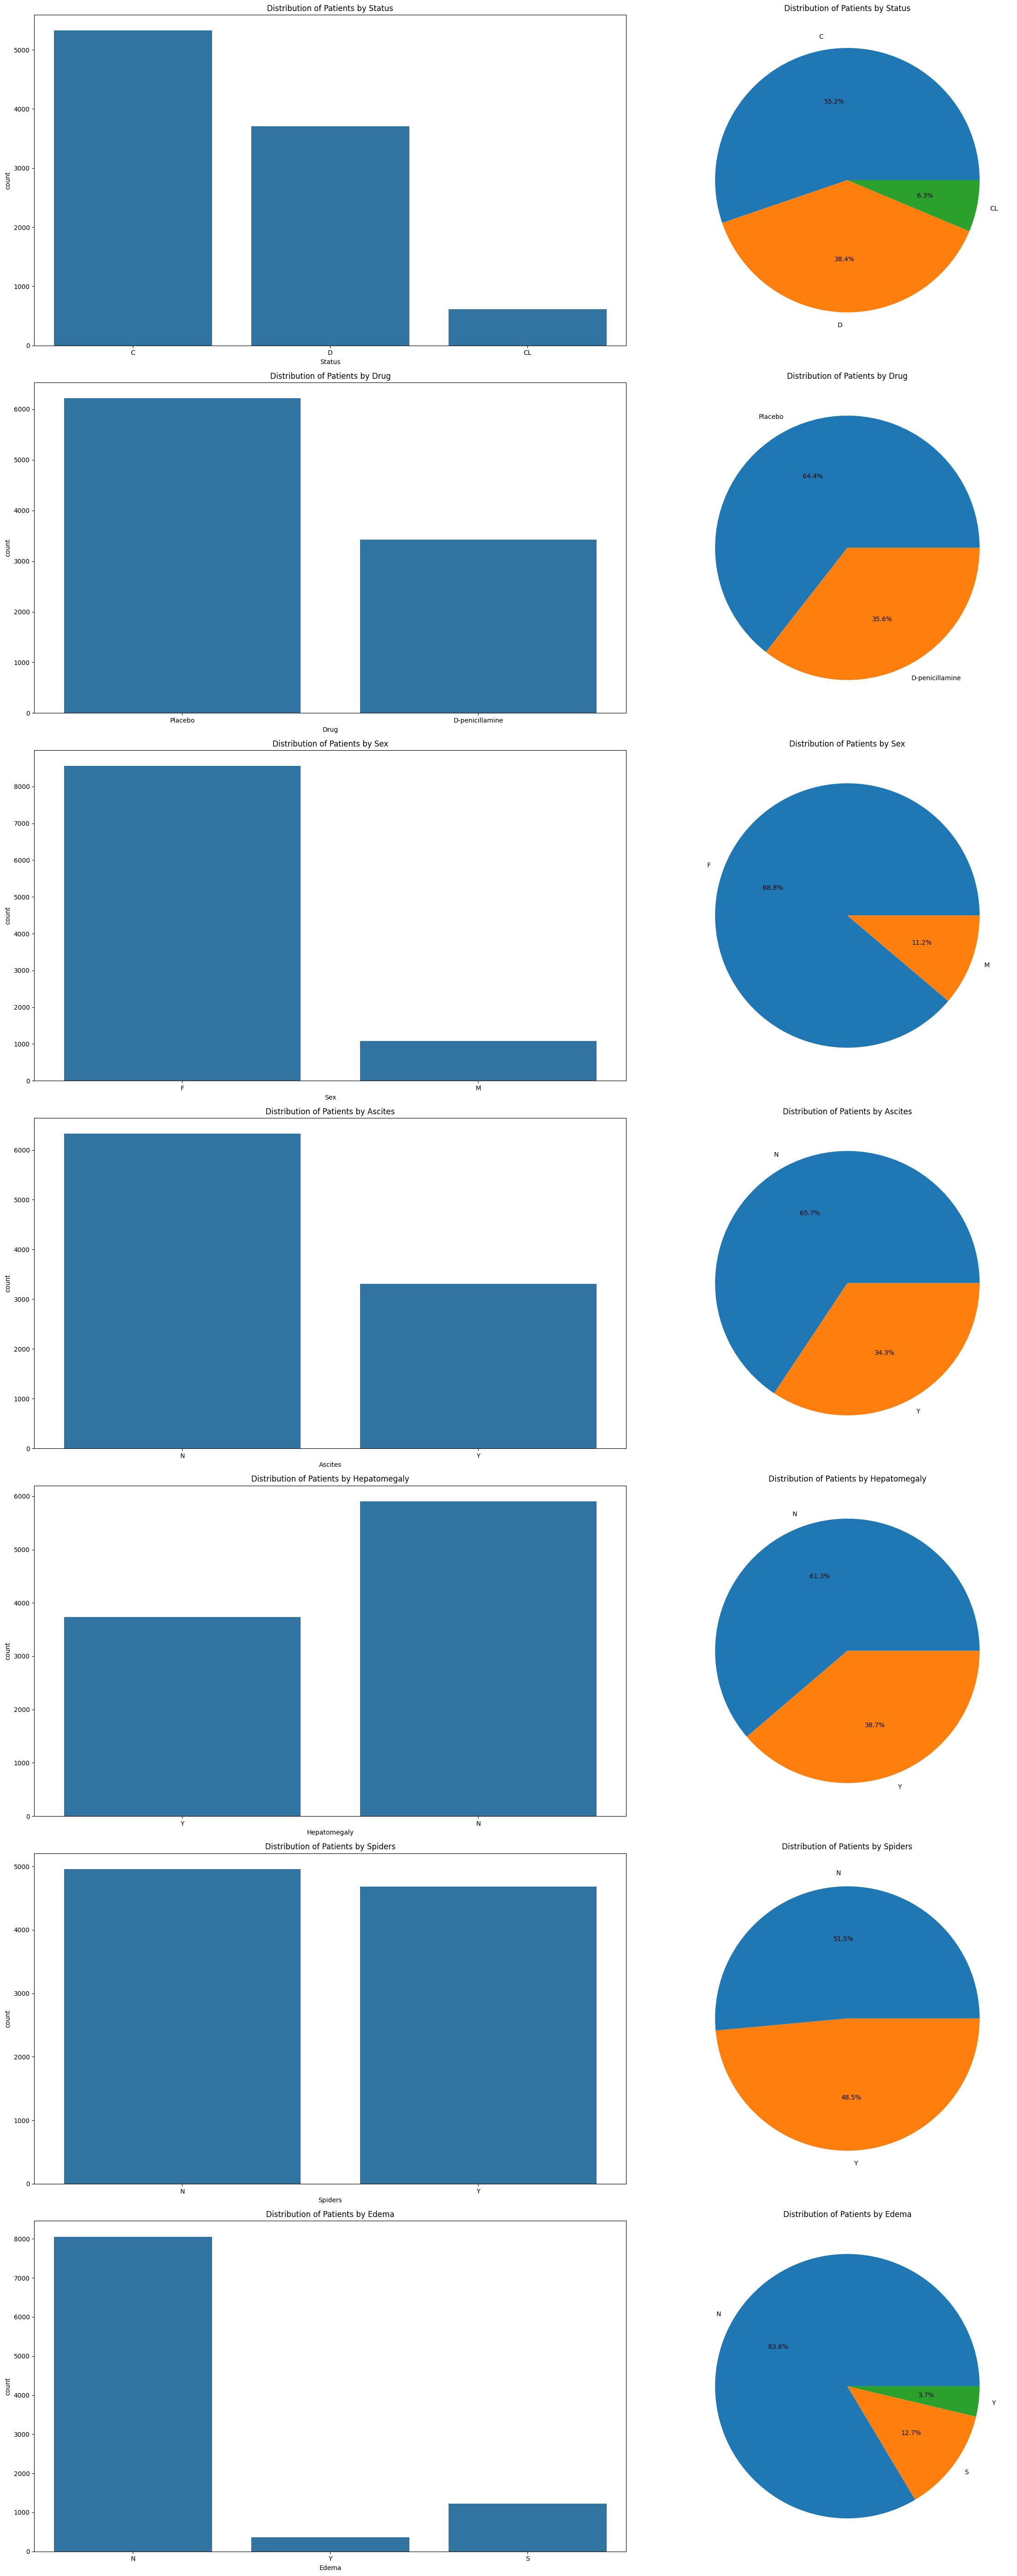

In [33]:
fig, axes = plt.subplots(nrows=round(len(categorical_cols)), ncols=2, figsize = (25,8*len(categorical_cols)))

# Iterate through each column and plot a countplot
for i, column in enumerate(categorical_cols):
   
    sns.countplot(data=df, x=column, ax=axes[i,0])
    axes[i, 0].set_title(f'Distribution of Patients by {column.capitalize()}')
    
    axes[i, 1].pie(df[column].value_counts(), autopct='%1.1f%%', labels=df[column].value_counts().index)
    axes[i, 1].set_title(f'Distribution of Patients by {column.capitalize()}')

    
# Hide any remaining empty subplots
# for j in range(len(categorical_cols), len(axes.flat)):
#     axes.flatten()[j].axis('off')

plt.tight_layout()
plt.show()

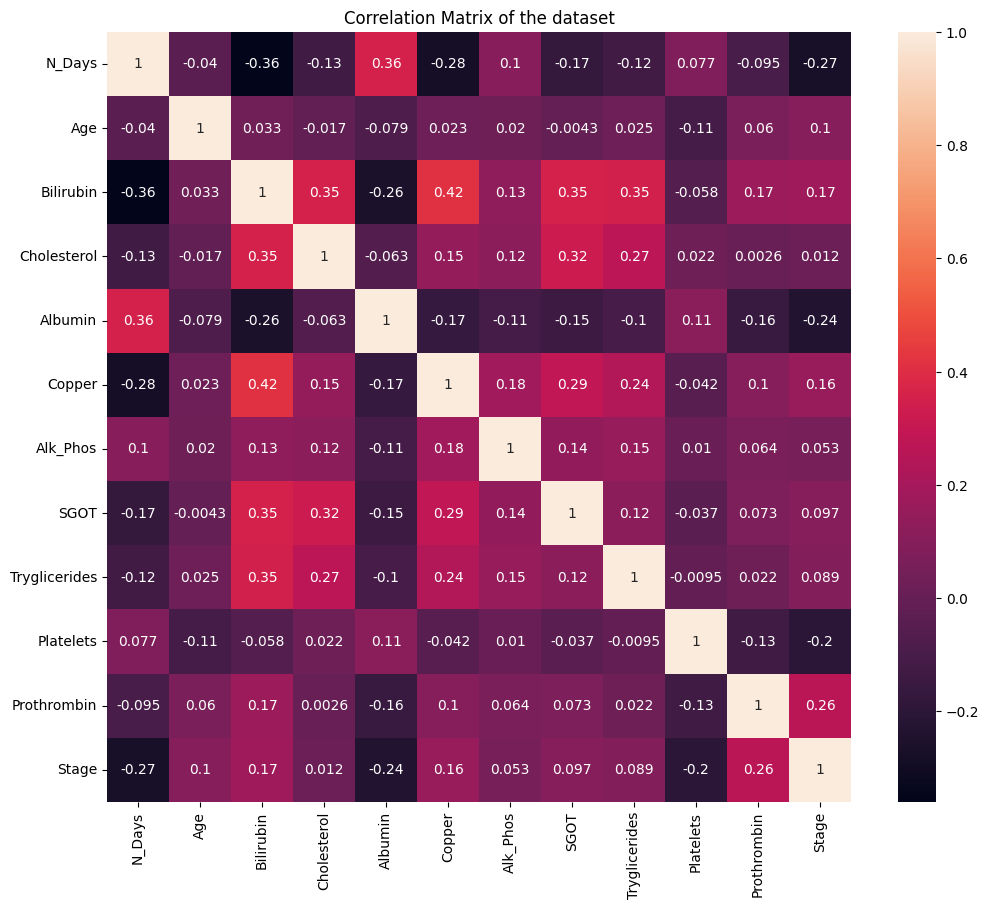

In [34]:
plt.figure(figsize = (12,10))
sns.heatmap(df[numerical_cols].corr(), annot = True)
plt.title('Correlation Matrix of the dataset')
plt.show()

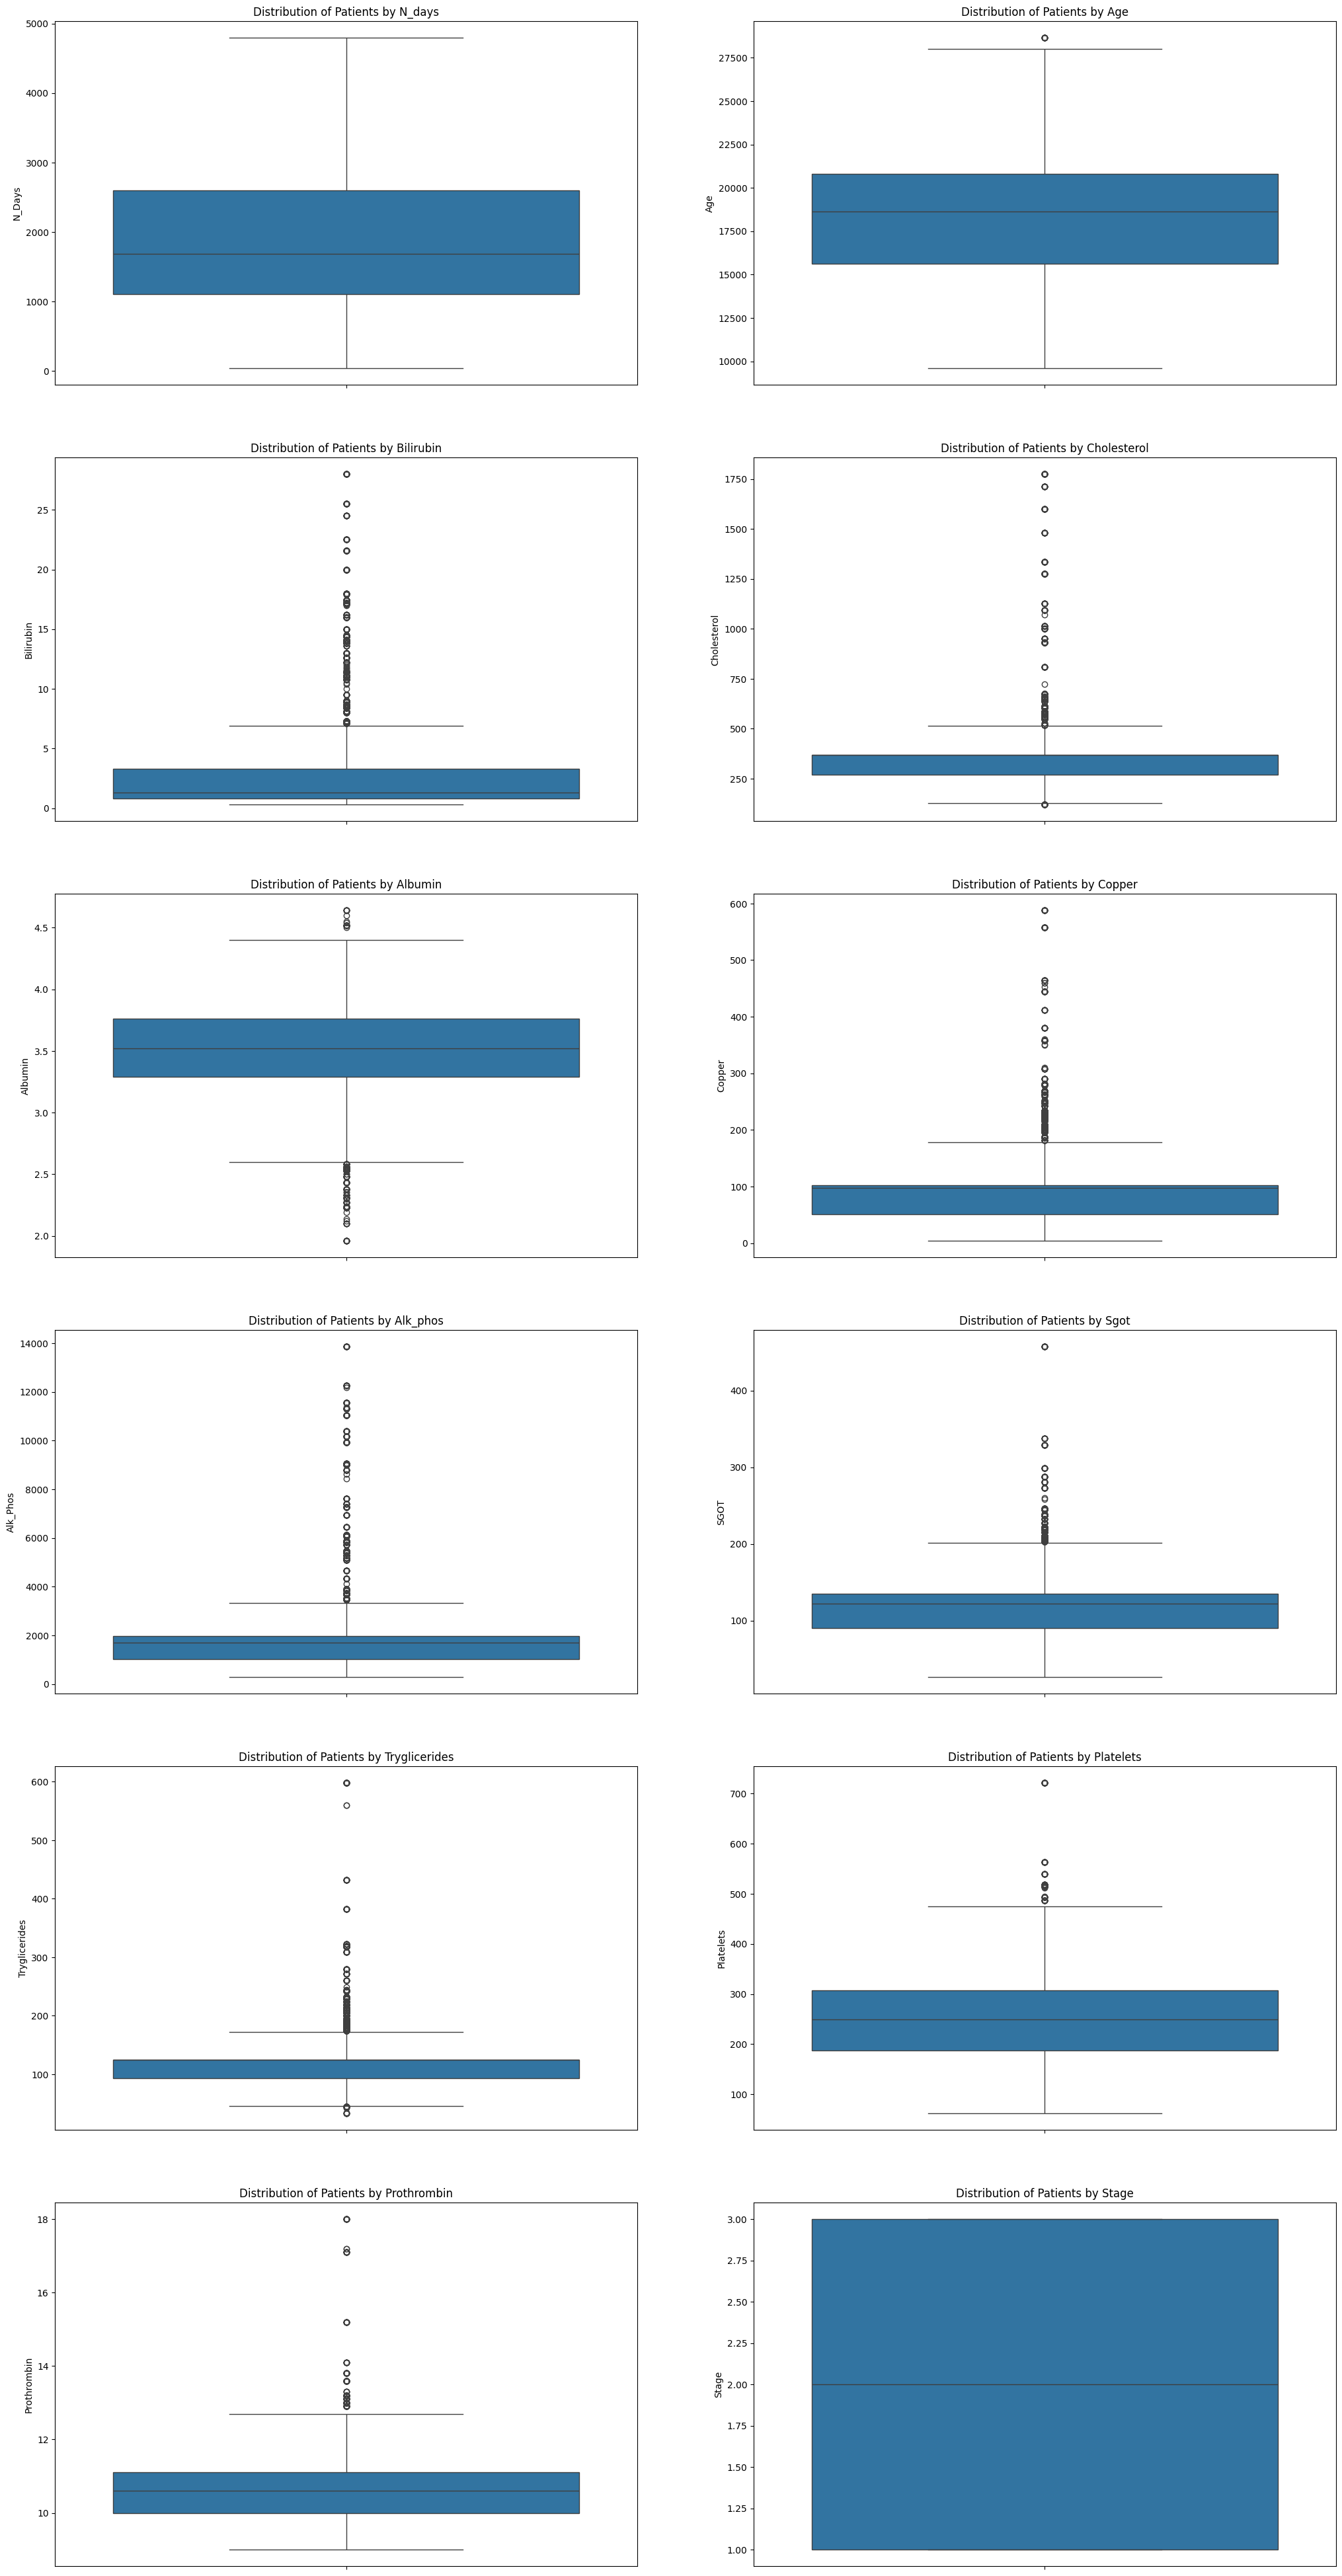

In [35]:
fig, axes = plt.subplots(nrows=round(len(numerical_cols)/2), ncols=2, figsize = (25,50))

# Iterate through each column and plot a countplot
for i, column in enumerate(numerical_cols):
   
    sns.boxplot(df[column],ax=axes[i//2,i%2])
    axes[i//2,i%2].set_title(f'Distribution of Patients by {column.capitalize()}')
    
    

# Hide any remaining empty subplots
for j in range(len(numerical_cols), len(axes.flat)):
    axes.flatten()[j].axis('off')

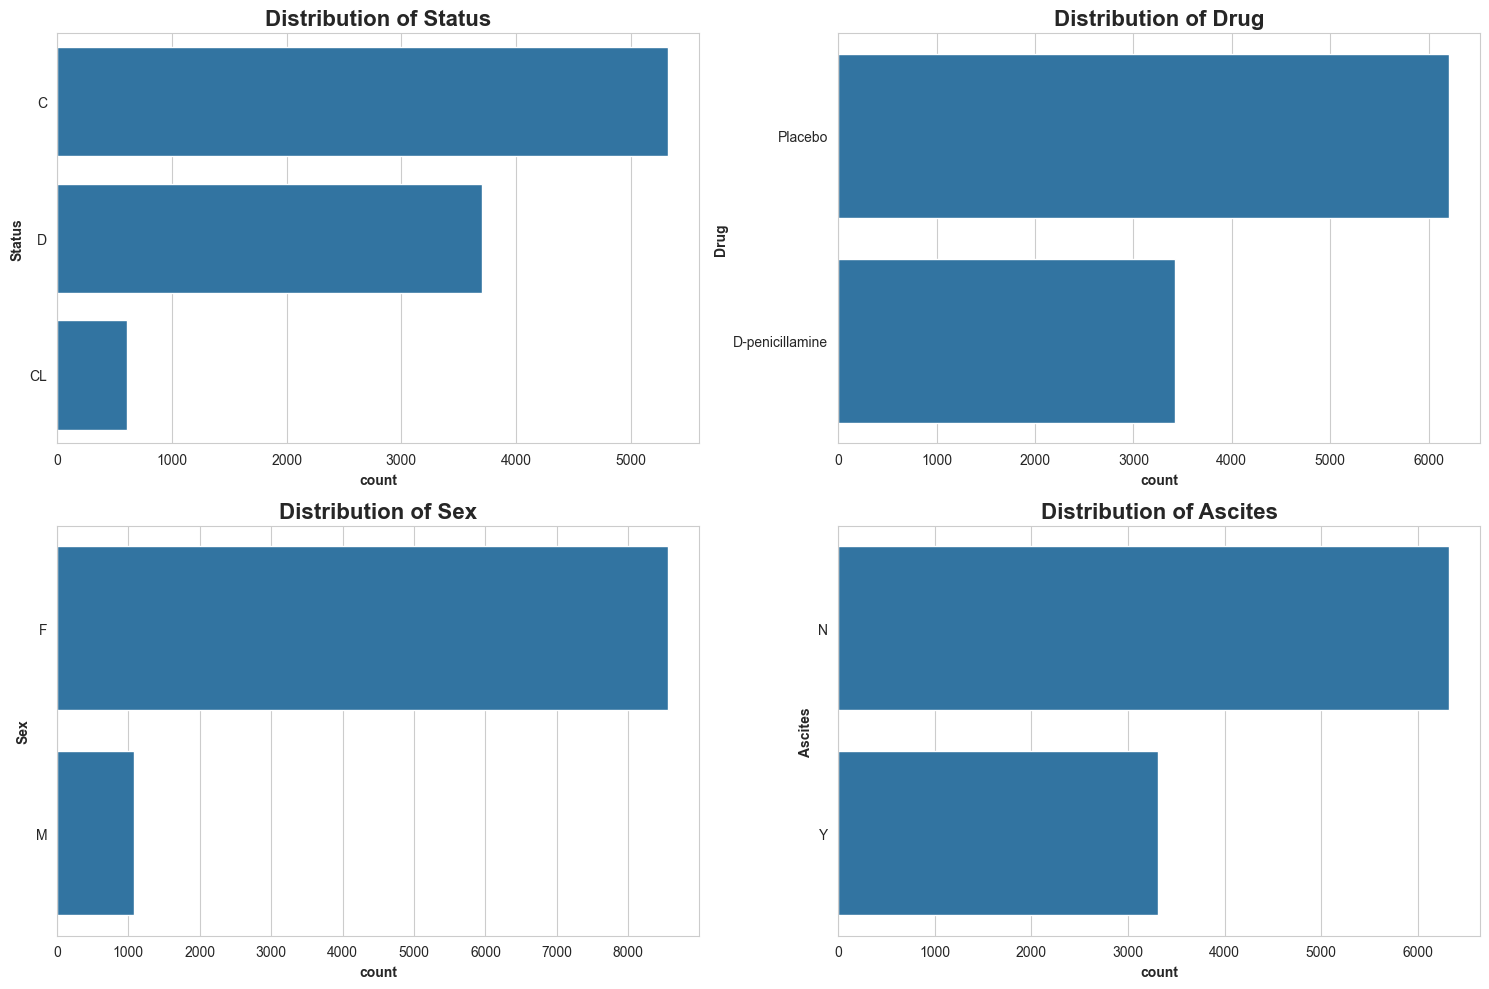

In [36]:
# Code from kaggle notebooks
# Set the style for seaborn
sns.set_style("whitegrid")

# Create a figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot for 'Status'
sns.countplot(y='Status', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Status', fontweight='bold', fontsize=16)
axes[0, 0].set_xlabel(axes[0, 0].get_xlabel(), fontweight='bold')
axes[0, 0].set_ylabel(axes[0, 0].get_ylabel(), fontweight='bold')

# Plot for 'Drug'
sns.countplot(y='Drug', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Drug', fontweight='bold', fontsize=16)
axes[0, 1].set_xlabel(axes[0, 1].get_xlabel(), fontweight='bold')
axes[0, 1].set_ylabel(axes[0, 1].get_ylabel(), fontweight='bold')

# Plot for 'Sex'
sns.countplot(y='Sex', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Sex', fontweight='bold', fontsize=16)
axes[1, 0].set_xlabel(axes[1, 0].get_xlabel(), fontweight='bold')
axes[1, 0].set_ylabel(axes[1, 0].get_ylabel(), fontweight='bold')

# Plot for 'Ascites'
sns.countplot(y='Ascites', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Ascites', fontweight='bold', fontsize=16)
axes[1, 1].set_xlabel(axes[1, 1].get_xlabel(), fontweight='bold')
axes[1, 1].set_ylabel(axes[1, 1].get_ylabel(), fontweight='bold')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

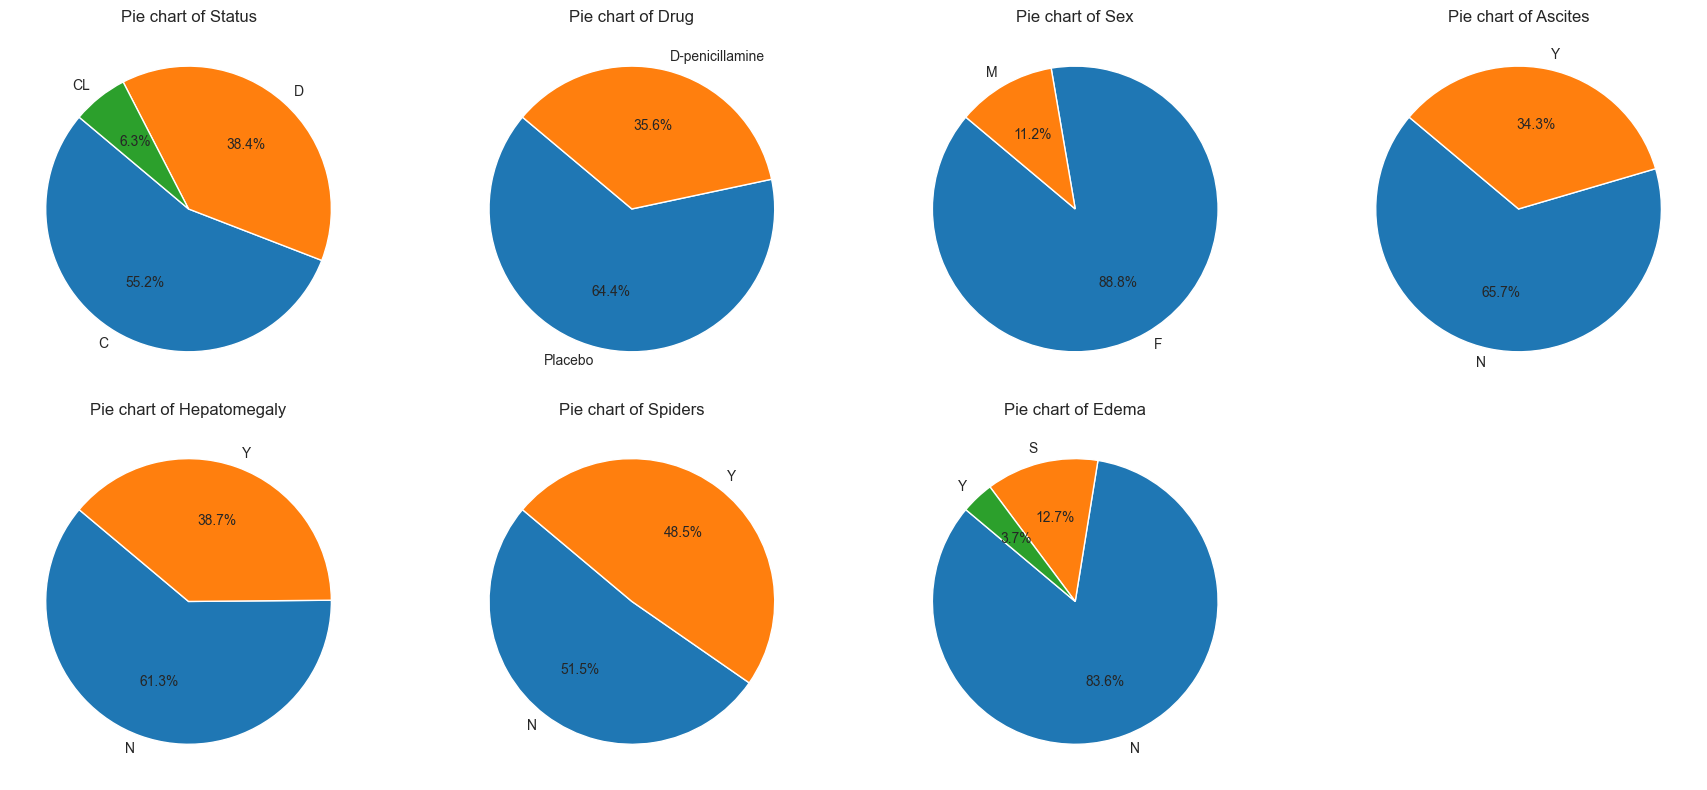

In [37]:
# Code from kaggle notebooks
# Define the categorical columns
categorical_columns = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

# Create subplots
fig, axs = plt.subplots(2, 4, figsize=(18, 8))

# Flatten the axs array for easy iteration
axs = axs.flatten()

# Plot each categorical variable
for i, column in enumerate(categorical_columns):
    # Pie chart
    if len(df[column].unique()) <= 5:
        axs[i].pie(df[column].value_counts(), labels=df[column].value_counts().index, autopct='%1.1f%%', startangle=140)
        axs[i].set_title(f'Pie chart of {column}')
    # Donut chart
    elif len(df[column].unique()) > 5 and len(df[column].unique()) <= 10:
        axs[i].pie(df[column].value_counts(), labels=df[column].value_counts().index, autopct='%1.1f%%', startangle=140)
        axs[i].add_artist(plt.Circle((0,0),0.70,fc='white'))
        axs[i].set_title(f'Donut chart of {column}')
    # Violin swarm plot
    elif len(df[column].unique()) > 10:
        sns.violinplot(x=column, data=df, ax=axs[i])
        sns.swarmplot(x=column, data=df, color='k', alpha=0.5, ax=axs[i])
        axs[i].set_title(f'Violin Swarm Plot of {column}')
    # Strip plot
    else:
        sns.stripplot(x=column, data=df, ax=axs[i])
        axs[i].set_title(f'Strip Plot of {column}')

# Hide any extra subplots if there are fewer than 8 categorical columns
for j in range(len(categorical_columns), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

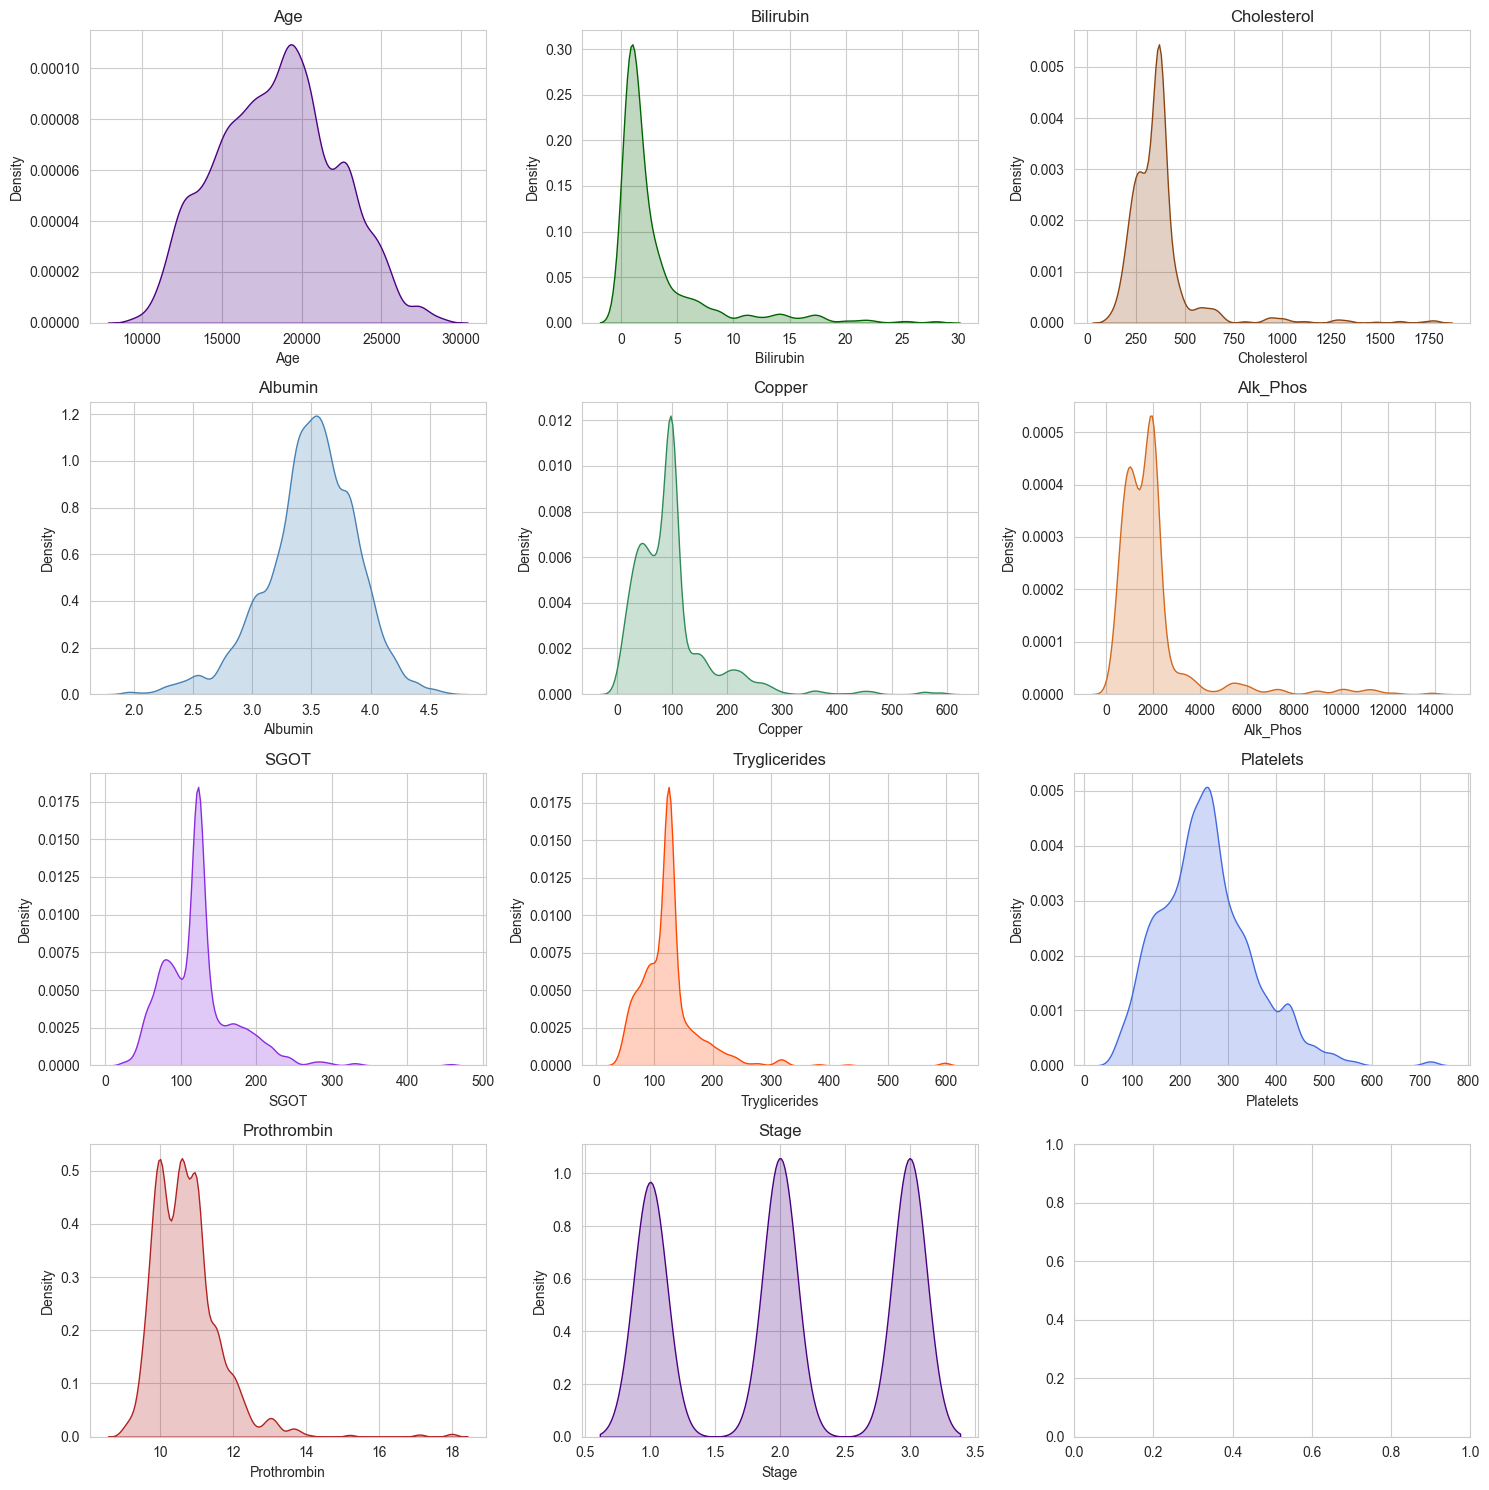

In [38]:
# Define color palette
colors = ['#4B0082', '#006400', '#8B4513', '#4682B4', '#2E8B57', '#D2691E', '#8A2BE2', '#FF4500', '#4169E1', '#B22222']

columns = ['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']
num_rows = 4
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
axes = axes.flatten()

for i, column in enumerate(columns):
    ax = axes[i]
    color = colors[i % len(colors)]  # Reuse colors if there are more columns than colors
    sns.kdeplot(data=df[column], ax=ax, fill=True, color=color)
    ax.set_title(column)
    ax.set_ylabel('Density')

plt.tight_layout()
plt.show()

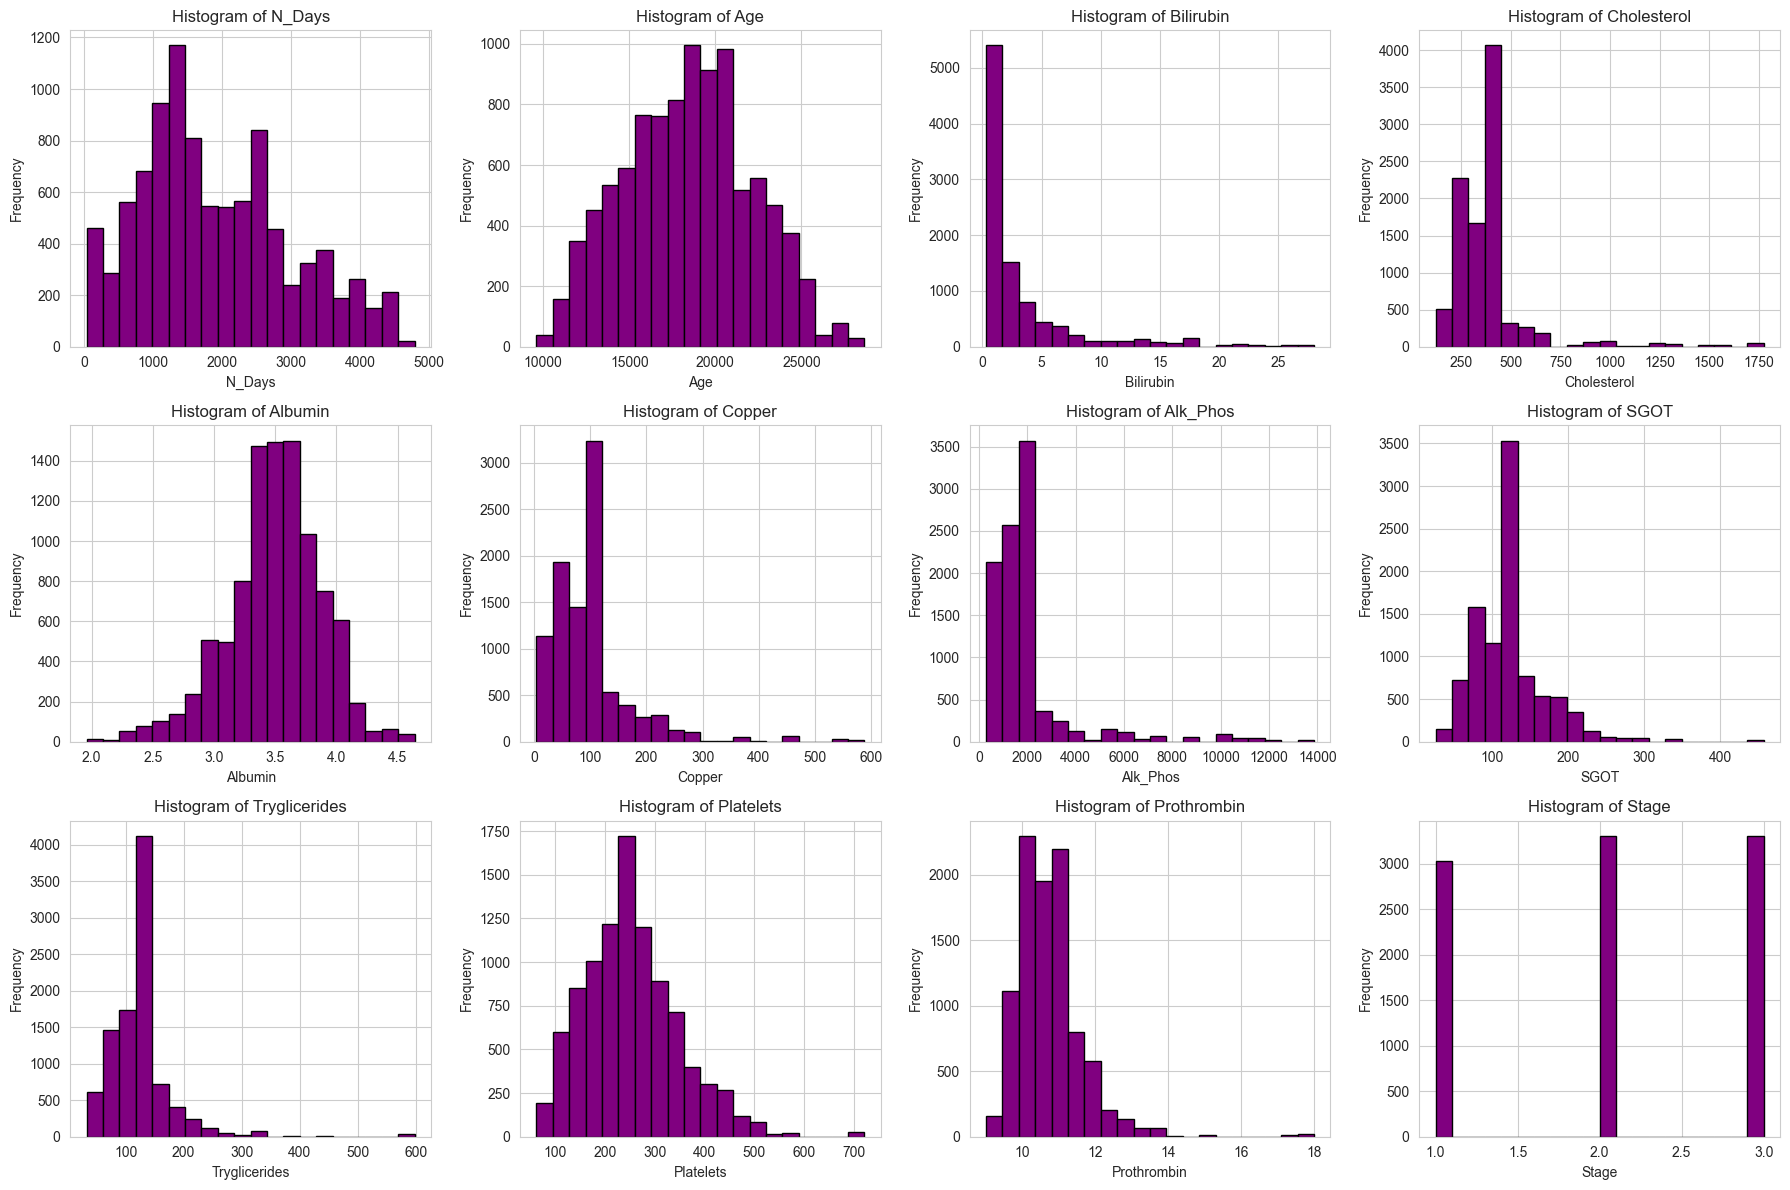

In [39]:
# Define the numeric columns
numeric_columns = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']


fig, axs = plt.subplots(3, 4, figsize=(18, 12))
axs = axs.flatten()

for i, column in enumerate(numeric_columns):
    axs[i].hist(df[column], bins=20, color='purple', edgecolor='black')
    axs[i].set_title(f'Histogram of {column}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Frequency')

for j in range(len(numeric_columns), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

### Understaing the data + removal of male row to avoid bias 

In [40]:
freq_of_stage = df['Stage'].value_counts().sort_values()
print(freq_of_stage)

Stage
1    3025
3    3306
2    3308
Name: count, dtype: int64


In [41]:
df['Sex'].value_counts()

Sex
F    8560
M    1079
Name: count, dtype: int64

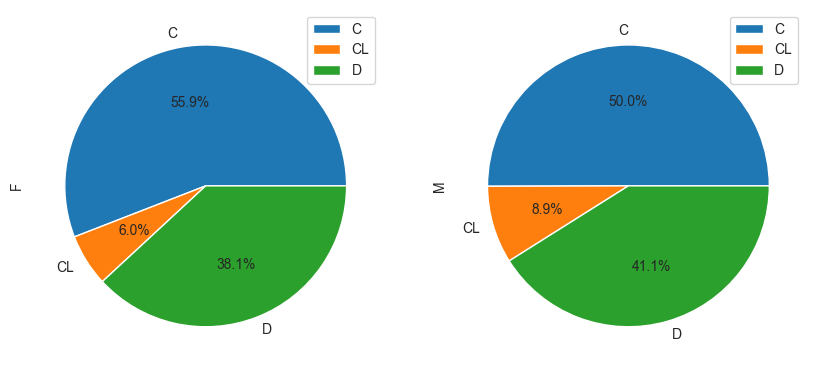

In [42]:
group_by_sex_and_status = pd.crosstab(df['Status'],df['Sex'])


group_by_sex_and_status.plot(kind = 'pie', subplots = True, figsize = (10,9), autopct='%1.1f%%')
plt.show()

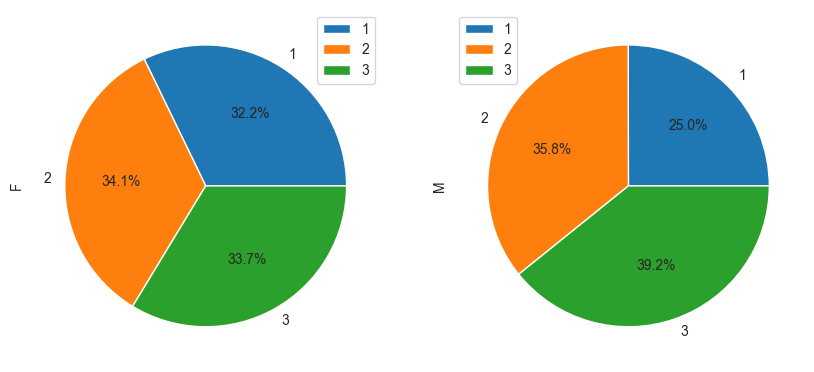

In [43]:
group_by_sex_and_stage = pd.crosstab(df['Stage'],df['Sex'])


group_by_sex_and_stage.plot(kind = 'pie', subplots = True, figsize = (10,9), autopct='%1.1f%%')
plt.show()

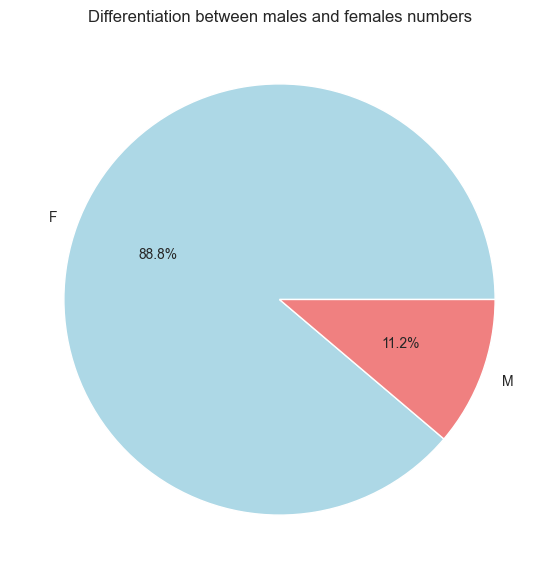

In [44]:
Stage_Count = df['Sex'].value_counts()

plt.figure(figsize=(10,7))
plt.pie(Stage_Count, labels = df['Sex'].unique(), autopct = '%1.1f%%', colors = ['lightblue', 'lightcoral'])
plt.title("Differentiation between males and females numbers")
plt.show()

In [45]:
df = df[df['Sex'] != "M"]

In [46]:
df['Sex'].value_counts()

Sex
F    8560
Name: count, dtype: int64

### working with outliars

In [47]:
numerical_columns = ['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper']

In [48]:
z_scores = df[numerical_columns].apply(zscore)
threshold = 3

df_no_outliers = df[(z_scores.abs() < threshold).all(axis=1)]

# Calculate the percentage of outliers before removal
outliers_percentage_before = (df.shape[0] - df_no_outliers.shape[0]) / df.shape[0] * 100

# Display the shape before removing outliers
print("DataFrame shape before removing outliers:", df.shape)

# Display the number of removed rows (outliers)
removed_rows = df.shape[0] - df_no_outliers.shape[0]
print("Number of removed rows (outliers):", removed_rows)

# Display the percentage of outliers before removal
print("Percentage of outliers before removal:", outliers_percentage_before, "%")

# Update the original DataFrame with outliers removed
df = df_no_outliers.copy()

# Display the updated DataFrame shape
print("DataFrame shape after removing outliers:", df.shape)

# Calculate the percentage of outliers after removal
outliers_percentage_after = 0  # Since all outliers have been removed, the percentage is now 0

# Display the percentage of outliers after removal
print("Percentage of outliers after removal:", outliers_percentage_after, "%")

DataFrame shape before removing outliers: (8560, 19)
Number of removed rows (outliers): 640
Percentage of outliers before removal: 7.476635514018691 %
DataFrame shape after removing outliers: (7920, 19)
Percentage of outliers after removal: 0 %


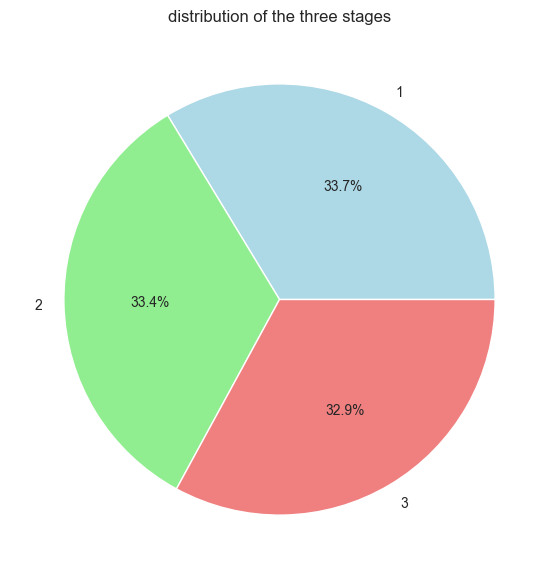

In [49]:
Stage_Count = df['Stage'].value_counts()

plt.figure(figsize=(10,7))
plt.pie(Stage_Count, labels = df['Stage'].unique(), autopct = '%1.1f%%', colors = ['lightblue', 'lightgreen', 'lightcoral'])
plt.title("distribution of the three stages")
plt.show()

In [50]:
freq_of_status = df['Status'].value_counts().sort_values()
total_status = df['Status'].count()
relative_freq_status = (freq_of_status/total_status) * 100
print(relative_freq_status)

Status
CL     5.694444
D     35.000000
C     59.305556
Name: count, dtype: float64


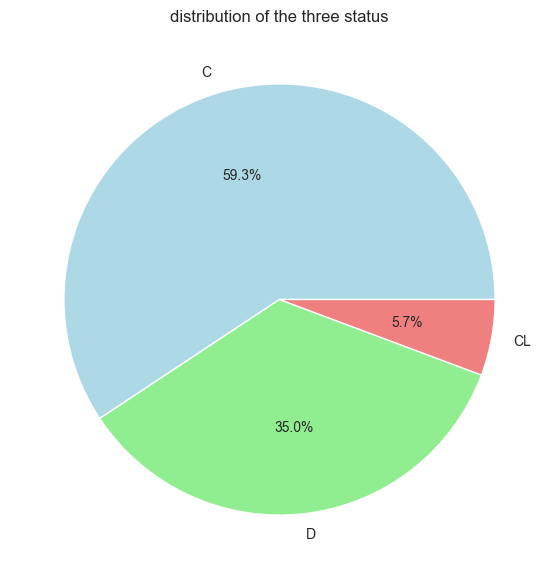

In [51]:
status_Count = df['Status'].value_counts()

plt.figure(figsize=(10,7))
plt.pie(status_Count, labels = df['Status'].unique(), autopct = '%1.1f%%', colors = ['lightblue', 'lightgreen', 'lightcoral'])
plt.title("distribution of the three status")
plt.show()

In [52]:
freq_of_drugs = df['Drug'].value_counts().sort_values()
total_drugs = df['Drug'].count()
relative_freq_of_drug = (freq_of_drugs / total_drugs) * 100
print(relative_freq_of_drug)

Drug
D-penicillamine    34.482323
Placebo            65.517677
Name: count, dtype: float64


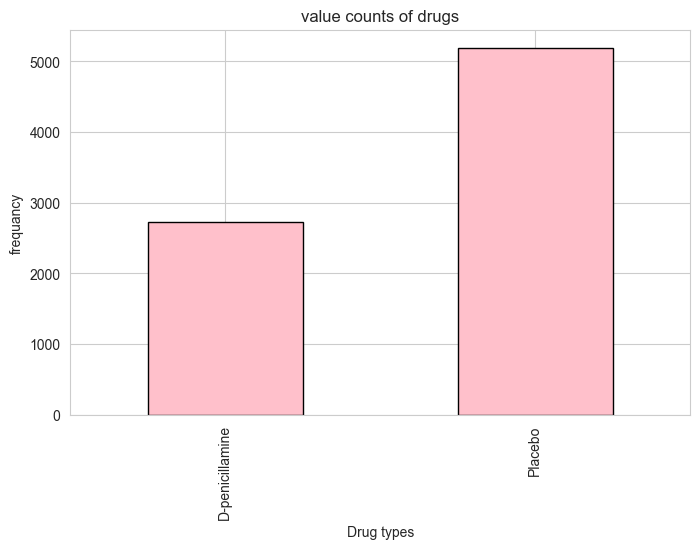

In [53]:
drug_count = df['Drug'].value_counts().sort_values()

plt.figure(figsize=(8, 5))
drug_count.plot(kind = 'bar', color = "pink", edgecolor = 'black')
plt.title("value counts of drugs")
plt.xlabel("Drug types")
plt.ylabel("frequancy")
plt.show()

Stage
3    2608
1    2644
2    2668
Name: count, dtype: int64


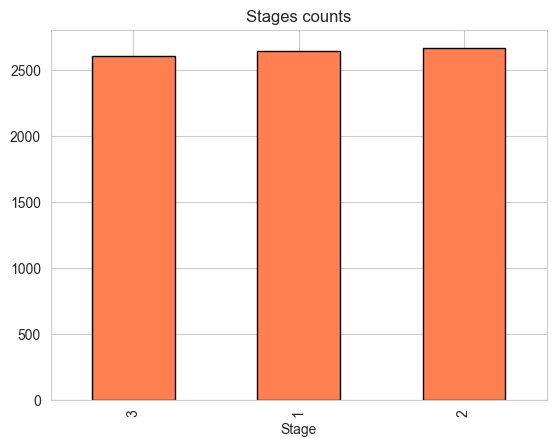

In [54]:
Stages_count = df['Stage'].value_counts().sort_values()
print(Stages_count)

Stages_count.plot(kind = 'bar', edgecolor = 'black', color = 'coral')
plt.title("Stages counts")
plt.show()

In [55]:
min_score_Age = df['Age'].min()
max_score_Age = df['Age'].max()

range_score_Age = max_score_Age - min_score_Age
print("range_score_Age:",range_score_Age)
# approximately 52 years 

range_score_Age: 18420


In [56]:
contingency_table_status_stage = pd.crosstab(df['Status'], df['Stage'], margins = True)
contingency_table_status_stage

Stage,1,2,3,All
Status,,,,
C,1910,1722,1065,4697
CL,115,166,170,451
D,619,780,1373,2772
All,2644,2668,2608,7920


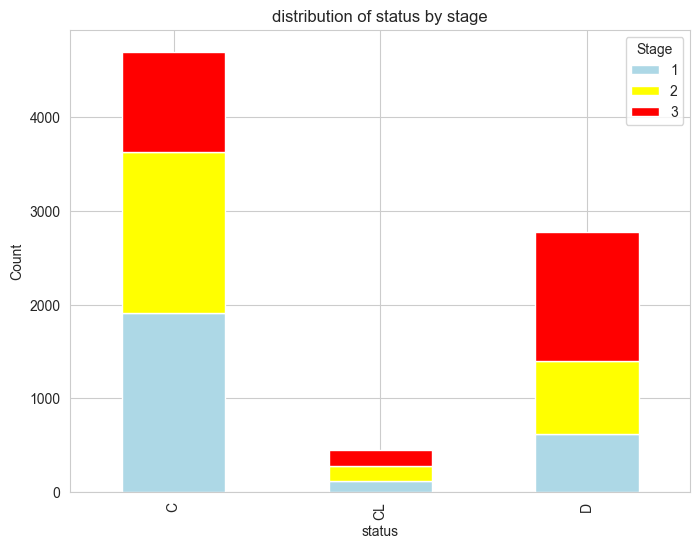

In [57]:
contingency_table = contingency_table_status_stage.iloc[:-1, :-1]

contingency_table.plot(kind='bar', stacked=True, figsize=(8, 6), color=['lightblue', 'yellow', 'red'])
plt.title('distribution of status by stage')
plt.xlabel('status')
plt.ylabel('Count')
plt.legend(title='Stage')
plt.show()

In [58]:
cont_table_sex_stage = pd.crosstab(df['Status'], df['Stage'], margins = True)
cont_table_sex_stage

Stage,1,2,3,All
Status,,,,
C,1910,1722,1065,4697
CL,115,166,170,451
D,619,780,1373,2772
All,2644,2668,2608,7920


In [59]:
cont_table_sex_stage = pd.crosstab(df['Sex'], df['Stage'], margins = True)
cont_table_sex_stage

Stage,1,2,3,All
Sex,,,,
F,2644,2668,2608,7920
All,2644,2668,2608,7920


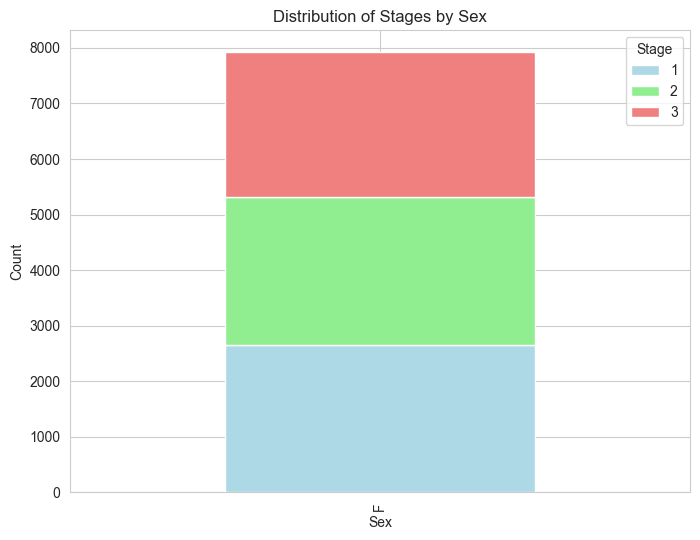

In [60]:
cont_table = cont_table_sex_stage.iloc[:-1, :-1]

cont_table.plot(kind = 'bar', stacked = True, figsize=(8,6), color = ['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Distribution of Stages by Sex') 
plt.xlabel('Sex') 
plt.ylabel('Count')
plt.legend(title='Stage')
plt.show()

In [61]:
df['Age_in_Years'] = df['Age'] / 365.25
print(df[['Age', 'Age_in_Years']].head())

     Age  Age_in_Years
0  18499     50.647502
2  11839     32.413415
3  16467     45.084189
4  21699     59.408624
5  16418     44.950034


In [62]:
df = df.drop(columns=['Age'])

In [63]:
df.head()

,N_Days,Status,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Age_in_Years
0,2221,C,Placebo,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1,50.647502
2,4184,C,Placebo,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2,32.413415
3,2090,D,Placebo,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2,45.084189
4,2105,D,Placebo,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1,59.408624
5,4427,C,Placebo,F,N,N,N,N,1.9,259.0,3.70,281.0,10396.8,188.34,178.0,327.0,10.4,2,44.950034


min age: 26.27789185489391
min age: 76.70910335386722


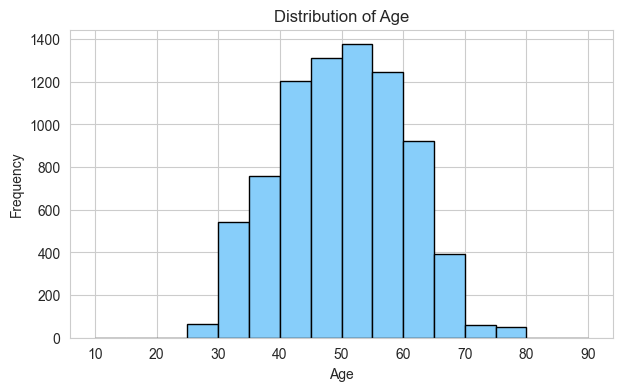

In [64]:
min_score_Age = df['Age_in_Years'].min()
max_score_Age = df['Age_in_Years'].max()
print('min age:', min_score_Age)
print('min age:', max_score_Age)

plt.figure(figsize=(7, 4)) 
binss = [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90]
plt.hist(df['Age_in_Years'], bins=binss, color='lightskyblue', edgecolor='black')  
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

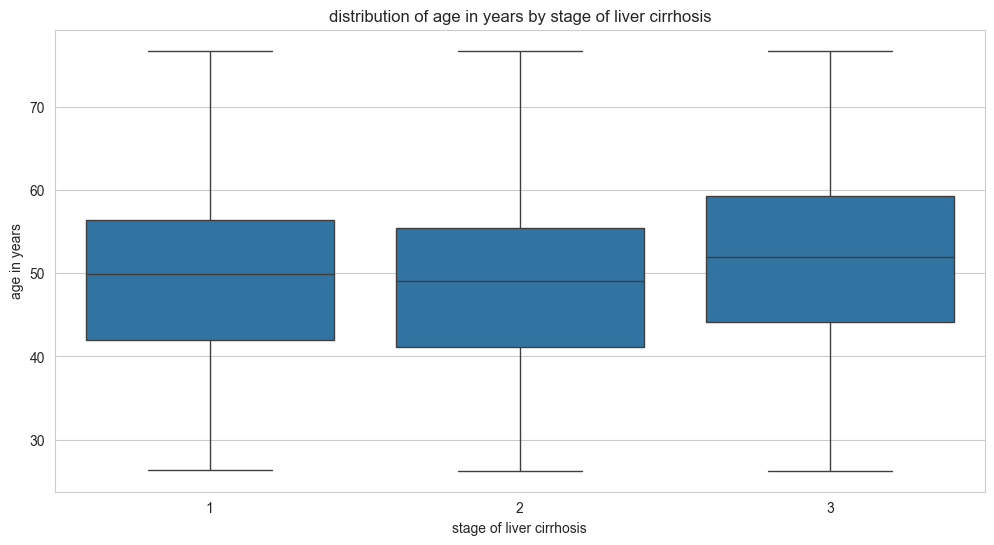

In [65]:
plt.figure(figsize=(12, 6)) 
sns.boxplot(x='Stage', y='Age_in_Years', data=df) 
plt.xlabel('stage of liver cirrhosis') 
plt.ylabel('age in years') 
plt.title('distribution of age in years by stage of liver cirrhosis')
plt.show()

In [66]:
grouped_data = df.groupby(['Sex', 'Status', 'Stage']).size().unstack(fill_value=0)
grouped_data

Stage          1     2     3
Sex Status                  
F   C       1910  1722  1065
    CL       115   166   170
    D        619   780  1373

In [67]:
cat_columns = df.select_dtypes(['object']).columns

label_encoder = LabelEncoder() # transform categorical values into numerical labels.
df[cat_columns] = df[cat_columns].apply(label_encoder.fit_transform)
df.head()

,N_Days,Status,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Age_in_Years
0,2221,0,1,0,0,1,0,0,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1,50.647502
2,4184,0,1,0,0,0,0,0,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2,32.413415
3,2090,2,1,0,0,0,0,0,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2,45.084189
4,2105,2,1,0,0,1,0,0,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1,59.408624
5,4427,0,1,0,0,0,0,0,1.9,259.0,3.70,281.0,10396.8,188.34,178.0,327.0,10.4,2,44.950034


In [68]:
df['Status'].unique()

array([0, 2, 1])

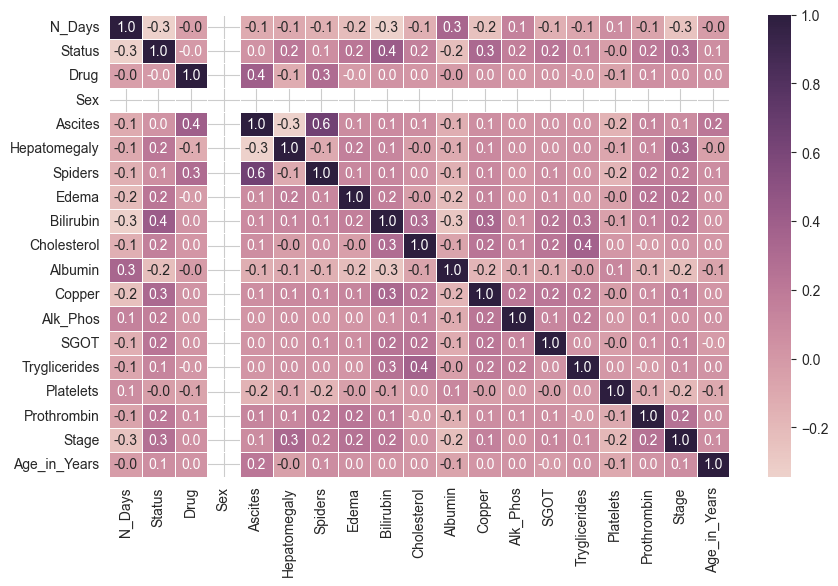

In [69]:
plt.figure(figsize=(10 ,6))
sns.heatmap(df.corr()  , annot=True , linewidth=.5, cmap=sns.cubehelix_palette(as_cmap=True) , fmt=".1f")
plt.show()

In [70]:
df = df.drop('Sex', axis = 1)

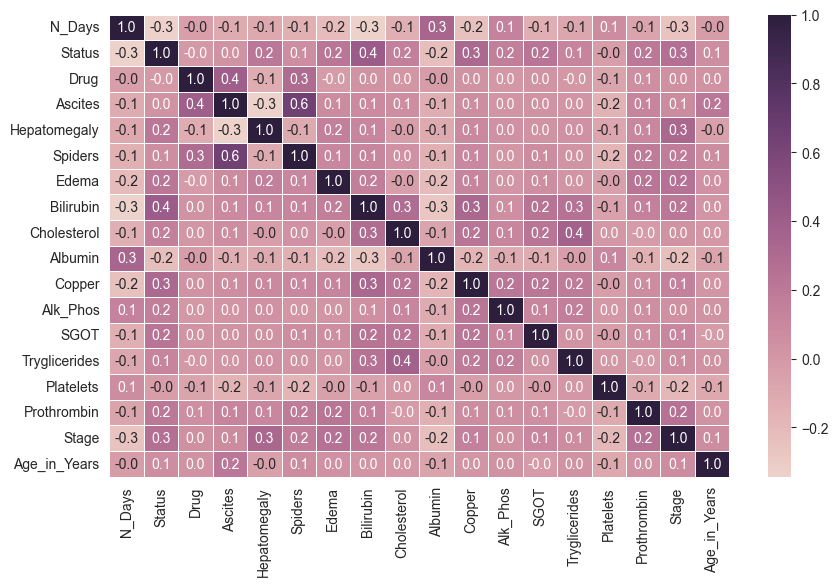

In [71]:
plt.figure(figsize=(10 ,6))
sns.heatmap(df.corr()  , annot=True , linewidth=.5, cmap=sns.cubehelix_palette(as_cmap=True) , fmt=".1f")
plt.show()
# Higher bilirubin levels are associated with worse patient statuses.

# Baseline models (no parameters)

In [72]:
X = df.drop('Stage', axis=1)
y = df['Stage'] - 1

## Data Normalization

In [73]:
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(X)
X = pd.DataFrame(normalized_data, columns=X.columns)
X

,N_Days,Status,Drug,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Age_in_Years
0,0.458561,0.0,1.0,0.0,1.0,0.0,0.0,0.012579,0.034940,0.737991,0.733553,0.022765,0.061151,0.042478,0.294385,0.100000,0.483225
1,0.871477,0.0,1.0,0.0,0.0,0.0,0.0,0.012579,0.240964,0.519651,0.154605,0.070285,0.223022,0.083186,0.247344,0.111111,0.121661
2,0.431005,1.0,1.0,0.0,0.0,0.0,0.0,0.025157,0.162651,0.606987,0.062500,0.054150,0.118705,0.044248,0.135053,0.133333,0.372910
3,0.434161,1.0,1.0,0.0,1.0,0.0,0.0,0.100629,0.440964,0.519651,0.230263,0.056213,0.190647,0.134513,0.135053,0.277778,0.656949
4,0.922592,0.0,1.0,0.0,0.0,0.0,0.0,0.100629,0.167470,0.589520,0.911184,0.744677,0.375934,0.256637,0.402124,0.155556,0.370250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7915,0.180900,0.5,1.0,1.0,0.0,1.0,0.0,0.182390,0.263855,0.362445,0.391447,0.224483,0.414597,0.090265,0.083460,0.211111,0.272096
7916,0.743795,0.0,1.0,1.0,0.0,1.0,0.0,0.025157,0.300615,0.497817,0.308054,0.124778,0.223268,0.162305,0.274659,0.077778,0.450543
7917,1.000000,0.0,1.0,1.0,0.0,1.0,0.0,0.094340,0.300615,0.388646,0.308054,0.124778,0.223268,0.162305,0.116844,0.166667,0.747991
7918,0.697728,1.0,0.0,0.0,1.0,0.0,0.0,0.113208,0.171084,0.493450,0.177632,0.129371,0.147482,0.090265,0.531108,0.311111,0.813626


## Splitting Data

In [74]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=60) 
X_train, X_validate, y_train, y_validate = train_test_split(X_trainval, y_trainval, test_size=0.4, stratify=y_trainval, random_state=60)

In [75]:
print("Training set shape:", X_train.shape) 
print("Validation set shape:", X_validate.shape) 
print("Test set shape:", X_test.shape)

Training set shape: (3564, 17)
Validation set shape: (2376, 17)
Test set shape: (1980, 17)


In [76]:
metrics_results_test = { 'Model': [], 
                    'Accuracy': [],
                    'Precision': [], 
                    'Recall': [], 
                    'F1 Score': [] }

In [77]:
metrics_results_val = { 'Model': [], 
                    'Accuracy': [],
                    'Precision': [], 
                    'Recall': [], 
                    'F1 Score': [] }

## Decision Tree 

In [78]:
DT_Classifier = DecisionTreeClassifier()

DT_Classifier.fit(X_train, y_train)
y_val_pred = DT_Classifier.predict(X_validate)
y_test_pred = DT_Classifier.predict(X_test)

accuracy_val = accuracy_score(y_validate, y_val_pred) 
precision_val = precision_score(y_validate, y_val_pred, average='weighted') 
recall_val = recall_score(y_validate, y_val_pred, average='weighted') 
f1_score_val = f1_score(y_validate, y_val_pred, average='weighted')

In [79]:
metrics_results_val['Model'].append('DT_Classifier') 
metrics_results_val['Accuracy'].append(accuracy_val) 
metrics_results_val['Precision'].append(precision_val) 
metrics_results_val['Recall'].append(recall_val) 
metrics_results_val['F1 Score'].append(f1_score_val)

print("validation set evaluation:") 
print("Accuracy:", accuracy_val) 
print("Precision:", precision_val) 
print("Recall:", recall_val) 
print("F1 Score:", f1_score_val)

validation set evaluation:
Accuracy: 0.7247474747474747
Precision: 0.7251656727794885
Recall: 0.7247474747474747
F1 Score: 0.7249244394075898


In [80]:
accuracy_test = accuracy_score(y_test, y_test_pred) 
precision_test = precision_score(y_test, y_test_pred, average='weighted') 
recall_test = recall_score(y_test, y_test_pred, average='weighted') 
f1_score_test = f1_score(y_test, y_test_pred, average='weighted')

metrics_results_test['Model'].append('DT_Classifier') 
metrics_results_test['Accuracy'].append(accuracy_test) 
metrics_results_test['Precision'].append(precision_test)
metrics_results_test['Recall'].append(recall_test) 
metrics_results_test['F1 Score'].append(f1_score_test)

print("\ntest set evaluation:") 
print("Accuracy:", accuracy_test) 
print("Precision:", precision_test) 
print("Recall:", recall_test) 
print("F1 Score:", f1_score_test)


test set evaluation:
Accuracy: 0.7267676767676767
Precision: 0.7268905971850191
Recall: 0.7267676767676767
F1 Score: 0.7268160072898039


In [81]:
print("\nMetrics Results (Validation):", metrics_results_val) 
print("\nMetrics Results (Test):", metrics_results_test)


Metrics Results (Validation): {'Model': ['DT_Classifier'], 'Accuracy': [0.7247474747474747], 'Precision': [0.7251656727794885], 'Recall': [0.7247474747474747], 'F1 Score': [0.7249244394075898]}

Metrics Results (Test): {'Model': ['DT_Classifier'], 'Accuracy': [0.7267676767676767], 'Precision': [0.7268905971850191], 'Recall': [0.7267676767676767], 'F1 Score': [0.7268160072898039]}


## Random Forest

In [82]:
RF_Classifier = RandomForestClassifier()
RF_Classifier.fit(X_train, y_train)
y_val_pred = RF_Classifier.predict(X_validate)
y_test_pred = RF_Classifier.predict(X_test)

accuracy_val = accuracy_score(y_validate, y_val_pred)
precision_val = precision_score(y_validate, y_val_pred, average='weighted')
recall_val = recall_score(y_validate, y_val_pred, average='weighted')
f1_score_val = f1_score(y_validate, y_val_pred, average='weighted')

In [83]:
metrics_results_val['Model'].append('RF_Classifier')
metrics_results_val['Accuracy'].append(accuracy_val)
metrics_results_val['Precision'].append(precision_val)
metrics_results_val['Recall'].append(recall_val)
metrics_results_val['F1 Score'].append(f1_score_val)

print("Validation set evaluation:") 
print("Accuracy:", accuracy_val) 
print("Precision:", precision_val) 
print("Recall:", recall_val) 
print("F1 Score:", f1_score_val)

Validation set evaluation:
Accuracy: 0.8333333333333334
Precision: 0.8332021534697515
Recall: 0.8333333333333334
F1 Score: 0.8332139071807154


In [84]:
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='weighted')
recall_test = recall_score(y_test, y_test_pred, average='weighted')
f1_score_test = f1_score(y_test, y_test_pred, average='weighted')

metrics_results_test['Model'].append('RF_Classifier')
metrics_results_test['Accuracy'].append(accuracy_test)
metrics_results_test['Precision'].append(precision_test)
metrics_results_test['Recall'].append(recall_test)
metrics_results_test['F1 Score'].append(f1_score_test)

print("\nTest set evaluation:") 
print("Accuracy:", accuracy_test) 
print("Precision:", precision_test) 
print("Recall:", recall_test) 
print("F1 Score:", f1_score_test)


Test set evaluation:
Accuracy: 0.8272727272727273
Precision: 0.8266344456663881
Recall: 0.8272727272727273
F1 Score: 0.8268251911127571


In [85]:
print("\nMetrics Results (Validation):", metrics_results_val) 
print("\nMetrics Results (Test):", metrics_results_test)


Metrics Results (Validation): {'Model': ['DT_Classifier', 'RF_Classifier'], 'Accuracy': [0.7247474747474747, 0.8333333333333334], 'Precision': [0.7251656727794885, 0.8332021534697515], 'Recall': [0.7247474747474747, 0.8333333333333334], 'F1 Score': [0.7249244394075898, 0.8332139071807154]}

Metrics Results (Test): {'Model': ['DT_Classifier', 'RF_Classifier'], 'Accuracy': [0.7267676767676767, 0.8272727272727273], 'Precision': [0.7268905971850191, 0.8266344456663881], 'Recall': [0.7267676767676767, 0.8272727272727273], 'F1 Score': [0.7268160072898039, 0.8268251911127571]}


## Gradient Boosting

In [86]:
GB_Classifier = GradientBoostingClassifier()

GB_Classifier.fit(X_train, y_train)
y_val_pred = GB_Classifier.predict(X_validate)
y_test_pred = GB_Classifier.predict(X_test)

accuracy_val = accuracy_score(y_validate, y_val_pred)
precision_val = precision_score(y_validate, y_val_pred, average='weighted')
recall_val = recall_score(y_validate, y_val_pred, average='weighted')
f1_score_val = f1_score(y_validate, y_val_pred, average='weighted')

In [87]:
metrics_results_val['Model'].append('GB_Classifier')
metrics_results_val['Accuracy'].append(accuracy_val)
metrics_results_val['Precision'].append(precision_val)
metrics_results_val['Recall'].append(recall_val)
metrics_results_val['F1 Score'].append(f1_score_val)

print("Validation set evaluation:") 
print("Accuracy:", accuracy_val) 
print("Precision:", precision_val) 
print("Recall:", recall_val) 
print("F1 Score:", f1_score_val)

Validation set evaluation:
Accuracy: 0.7752525252525253
Precision: 0.7767546267661906
Recall: 0.7752525252525253
F1 Score: 0.7757203150044338


In [88]:
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='weighted')
recall_test = recall_score(y_test, y_test_pred, average='weighted')
f1_score_test = f1_score(y_test, y_test_pred, average='weighted')

metrics_results_test['Model'].append('GB_Classifier')
metrics_results_test['Accuracy'].append(accuracy_test)
metrics_results_test['Precision'].append(precision_test)
metrics_results_test['Recall'].append(recall_test)
metrics_results_test['F1 Score'].append(f1_score_test)

print("\nTest set evaluation:") 
print("Accuracy:", accuracy_test) 
print("Precision:", precision_test) 
print("Recall:", recall_test) 
print("F1 Score:", f1_score_test)


Test set evaluation:
Accuracy: 0.7752525252525253
Precision: 0.7757259714838828
Recall: 0.7752525252525253
F1 Score: 0.775344525873036


In [89]:
print("\nMetrics Results (Validation):", metrics_results_val) 
print("\nMetrics Results (Test):", metrics_results_test)


Metrics Results (Validation): {'Model': ['DT_Classifier', 'RF_Classifier', 'GB_Classifier'], 'Accuracy': [0.7247474747474747, 0.8333333333333334, 0.7752525252525253], 'Precision': [0.7251656727794885, 0.8332021534697515, 0.7767546267661906], 'Recall': [0.7247474747474747, 0.8333333333333334, 0.7752525252525253], 'F1 Score': [0.7249244394075898, 0.8332139071807154, 0.7757203150044338]}

Metrics Results (Test): {'Model': ['DT_Classifier', 'RF_Classifier', 'GB_Classifier'], 'Accuracy': [0.7267676767676767, 0.8272727272727273, 0.7752525252525253], 'Precision': [0.7268905971850191, 0.8266344456663881, 0.7757259714838828], 'Recall': [0.7267676767676767, 0.8272727272727273, 0.7752525252525253], 'F1 Score': [0.7268160072898039, 0.8268251911127571, 0.775344525873036]}


## XGBoost

In [90]:
XGB_Classifier = xgb.XGBClassifier()

XGB_Classifier.fit(X_train, y_train)
y_val_pred = XGB_Classifier.predict(X_validate)
y_test_pred = XGB_Classifier.predict(X_test)

In [91]:
accuracy_val = accuracy_score(y_validate, y_val_pred)
precision_val = precision_score(y_validate, y_val_pred, average='weighted')
recall_val = recall_score(y_validate, y_val_pred, average='weighted')
f1_score_val = f1_score(y_validate, y_val_pred, average='weighted')

metrics_results_val['Model'].append('XGB_Classifier')
metrics_results_val['Accuracy'].append(accuracy_val)
metrics_results_val['Precision'].append(precision_val)
metrics_results_val['Recall'].append(recall_val)
metrics_results_val['F1 Score'].append(f1_score_val)

print("Validation set evaluation:") 
print("Accuracy:", accuracy_val) 
print("Precision:", precision_val) 
print("Recall:", recall_val) 
print("F1 Score:", f1_score_val)

Validation set evaluation:
Accuracy: 0.8640572390572391
Precision: 0.8642403810108856
Recall: 0.8640572390572391
F1 Score: 0.8640534885803279


In [92]:
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='weighted')
recall_test = recall_score(y_test, y_test_pred, average='weighted')
f1_score_test = f1_score(y_test, y_test_pred, average='weighted')

metrics_results_test['Model'].append('XGB_Classifier')
metrics_results_test['Accuracy'].append(accuracy_test)
metrics_results_test['Precision'].append(precision_test)
metrics_results_test['Recall'].append(recall_test)
metrics_results_test['F1 Score'].append(f1_score_test)

print("\nTest set evaluation:") 
print("Accuracy:", accuracy_test) 
print("Precision:", precision_test) 
print("Recall:", recall_test) 
print("F1 Score:", f1_score_test)


Test set evaluation:
Accuracy: 0.8717171717171717
Precision: 0.871679950780182
Recall: 0.8717171717171717
F1 Score: 0.8716409796403449


In [93]:
print("\nMetrics Results (Validation):", metrics_results_val) 
print("\nMetrics Results (Test):", metrics_results_test)


Metrics Results (Validation): {'Model': ['DT_Classifier', 'RF_Classifier', 'GB_Classifier', 'XGB_Classifier'], 'Accuracy': [0.7247474747474747, 0.8333333333333334, 0.7752525252525253, 0.8640572390572391], 'Precision': [0.7251656727794885, 0.8332021534697515, 0.7767546267661906, 0.8642403810108856], 'Recall': [0.7247474747474747, 0.8333333333333334, 0.7752525252525253, 0.8640572390572391], 'F1 Score': [0.7249244394075898, 0.8332139071807154, 0.7757203150044338, 0.8640534885803279]}

Metrics Results (Test): {'Model': ['DT_Classifier', 'RF_Classifier', 'GB_Classifier', 'XGB_Classifier'], 'Accuracy': [0.7267676767676767, 0.8272727272727273, 0.7752525252525253, 0.8717171717171717], 'Precision': [0.7268905971850191, 0.8266344456663881, 0.7757259714838828, 0.871679950780182], 'Recall': [0.7267676767676767, 0.8272727272727273, 0.7752525252525253, 0.8717171717171717], 'F1 Score': [0.7268160072898039, 0.8268251911127571, 0.775344525873036, 0.8716409796403449]}


## BaseLine Models results Comparison 

In [94]:
df_validation_baseline = pd.DataFrame(metrics_results_val)
df_test_baseline = pd.DataFrame(metrics_results_test)

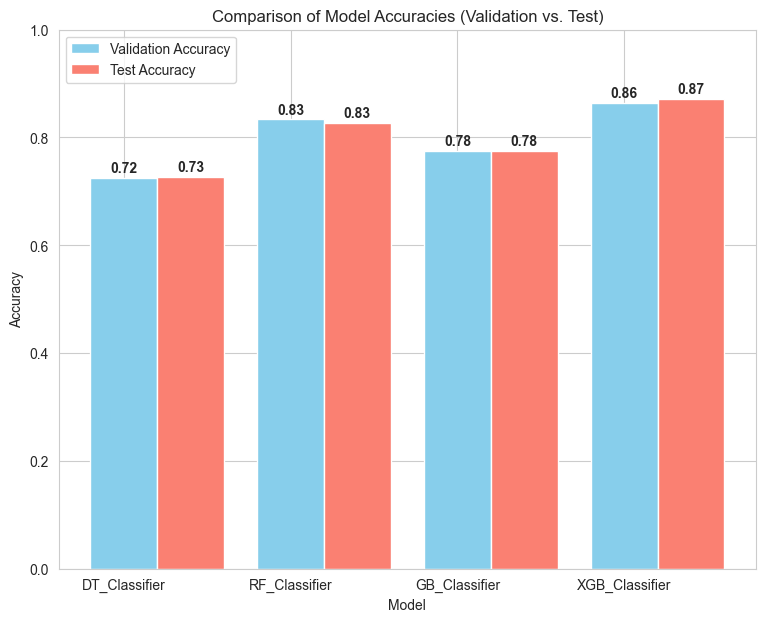

[0.7267676767676767, 0.8272727272727273, 0.7752525252525253, 0.8717171717171717]


In [95]:
plt.figure(figsize=(9, 7))
plt.bar(df_validation_baseline['Model'], df_validation_baseline['Accuracy'], color='skyblue', width=0.4, align='center', label='Validation Accuracy')
plt.bar([i + 0.4 for i in range(len(df_test_baseline))], df_test_baseline['Accuracy'], color='salmon', width=0.4, align='center', label='Test Accuracy')

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies (Validation vs. Test)')
plt.ylim(0, 1)
plt.legend()

# Add text labels for the accuracies
for i in range(len(df_validation_baseline)):
    plt.text(i, df_validation_baseline['Accuracy'][i] + 0.01, f"{df_validation_baseline['Accuracy'][i]:.2f}", ha='center', fontsize=10, fontweight='bold')
    plt.text(i + 0.4, df_test_baseline['Accuracy'][i] + 0.01, f"{df_test_baseline['Accuracy'][i]:.2f}", ha='center', fontsize=10, fontweight='bold')

plt.show()
print(metrics_results_test['Accuracy'])

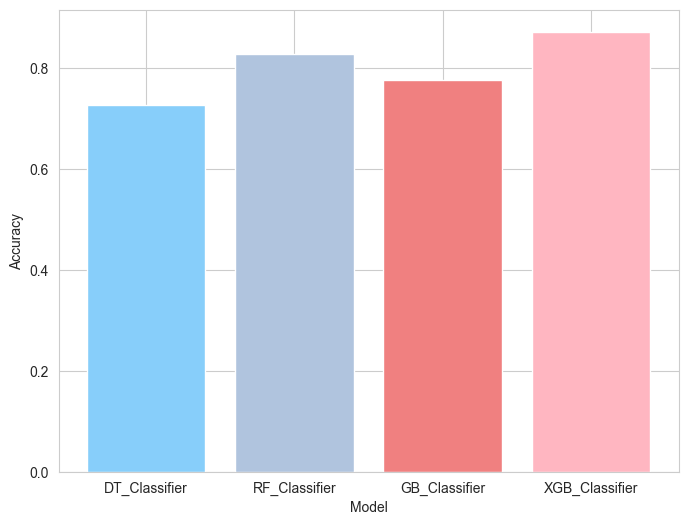

0    0.726768
1    0.827273
2    0.775253
3    0.871717
Name: Accuracy, dtype: float64


In [96]:
df_metrics_results = pd.DataFrame(metrics_results_test)

plt.figure(figsize=(8, 6))
plt.bar(df_metrics_results['Model'], df_metrics_results['Accuracy'], color=['lightskyblue', 'lightsteelblue', 'lightcoral', 'lightpink', 'lightseagreen'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

print(df_metrics_results['Accuracy'])

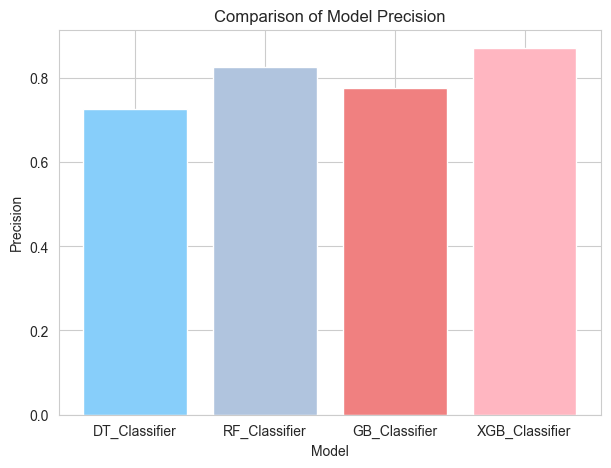

In [97]:
plt.figure(figsize=(7, 5)) 
bars = plt.bar(df_metrics_results['Model'], df_metrics_results['Precision'], color=['lightskyblue', 'lightsteelblue', 'lightcoral', 'lightpink', 'lightseagreen']) 
plt.xlabel('Model') 
plt.ylabel('Precision') 
plt.title('Comparison of Model Precision')
plt.show()

# Precision measures the model’s ability to correctly identify positive instances out of the total instances it predicted as positive, 
# XGBoost has the highest precision (0.90), indicating fewer false positives.

# Models with Tuned parameters 

In [98]:
metrics_results_Tuned_par_test = { 'Model': [], 
                              'Accuracy': [],
                              'Precision': [], 
                              'Recall': [], 
                              'F1 Score': [] }

In [99]:
metrics_results_Tuned_par_val = { 'Model': [], 
                              'Accuracy': [],
                              'Precision': [], 
                              'Recall': [], 
                              'F1 Score': [] }

## Decision Tree with max_depth and min_sample_split

In [100]:
dt_model = DecisionTreeClassifier(max_depth=80, min_samples_split=7)
dt_model.fit(X_train, y_train)
y_val_pred = dt_model.predict(X_validate)
y_test_pred = dt_model.predict(X_test)

In [101]:
accuracy_val = accuracy_score(y_validate, y_val_pred)
precision_val = precision_score(y_validate, y_val_pred, average='weighted', zero_division =1)
recall_val = recall_score(y_validate, y_val_pred, average='weighted')
f1_val = f1_score(y_validate, y_val_pred, average='weighted')

metrics_results_Tuned_par_val['Model'].append('Decision Tree')
metrics_results_Tuned_par_val['Accuracy'].append(accuracy_val)
metrics_results_Tuned_par_val['Precision'].append(precision_val)
metrics_results_Tuned_par_val['Recall'].append(recall_val)
metrics_results_Tuned_par_val['F1 Score'].append(f1_val)

print("Validation Metrics:")
print("Model: ", metrics_results_Tuned_par_val['Model'])
print("Accuracy: ", metrics_results_Tuned_par_val['Accuracy'])
print("Precision: ", metrics_results_Tuned_par_val['Precision'])
print("Recall: ", metrics_results_Tuned_par_val['Recall'])
print("F1 Score: ", metrics_results_Tuned_par_val['F1 Score'])

Validation Metrics:
Model:  ['Decision Tree']
Accuracy:  [0.7121212121212122]
Precision:  [0.7129912263945472]
Recall:  [0.7121212121212122]
F1 Score:  [0.712455236353262]


In [102]:
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='weighted', zero_division=1)
recall_test = recall_score(y_test, y_test_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')

metrics_results_Tuned_par_test['Model'].append('Decision Tree')
metrics_results_Tuned_par_test['Accuracy'].append(accuracy_test)
metrics_results_Tuned_par_test['Precision'].append(precision_test)
metrics_results_Tuned_par_test['Recall'].append(recall_test)
metrics_results_Tuned_par_test['F1 Score'].append(f1_test)

print("\nTest Metrics:")
print("Model: ", metrics_results_Tuned_par_test['Model'])
print("Accuracy: ", metrics_results_Tuned_par_test['Accuracy'])
print("Precision: ", metrics_results_Tuned_par_test['Precision'])
print("Recall: ", metrics_results_Tuned_par_test['Recall'])
print("F1 Score: ", metrics_results_Tuned_par_test['F1 Score'])


Test Metrics:
Model:  ['Decision Tree']
Accuracy:  [0.7186868686868687]
Precision:  [0.7196633167118638]
Recall:  [0.7186868686868687]
F1 Score:  [0.7190159263462177]


In [103]:
print("\nMetrics Results (Validation):", metrics_results_Tuned_par_val)
print("\nMetrics Results (Test):", metrics_results_Tuned_par_test)


Metrics Results (Validation): {'Model': ['Decision Tree'], 'Accuracy': [0.7121212121212122], 'Precision': [0.7129912263945472], 'Recall': [0.7121212121212122], 'F1 Score': [0.712455236353262]}

Metrics Results (Test): {'Model': ['Decision Tree'], 'Accuracy': [0.7186868686868687], 'Precision': [0.7196633167118638], 'Recall': [0.7186868686868687], 'F1 Score': [0.7190159263462177]}


## Random forest with n_estimate, max_depth and min_samples_splits parameters

In [104]:
rf_model = RandomForestClassifier(n_estimators= 50, max_depth=45, min_samples_split= 12, random_state=67)
rf_model.fit(X_train, y_train)
y_val_pred = rf_model.predict(X_validate)
y_test_pred = rf_model.predict(X_test)

In [105]:
accuracy_val = accuracy_score(y_validate, y_val_pred)
precision_val = precision_score(y_validate, y_val_pred, average='weighted')
recall_val = recall_score(y_validate, y_val_pred, average='weighted')
f1_val = f1_score(y_validate, y_val_pred, average='weighted')

metrics_results_Tuned_par_val['Model'].append('Random Forest')
metrics_results_Tuned_par_val['Accuracy'].append(accuracy_val)
metrics_results_Tuned_par_val['Precision'].append(precision_val)
metrics_results_Tuned_par_val['Recall'].append(recall_val)
metrics_results_Tuned_par_val['F1 Score'].append(f1_val)

print("Validation Metrics:")
print("Model: ", metrics_results_Tuned_par_val['Model'])
print("Accuracy: ", metrics_results_Tuned_par_val['Accuracy'])
print("Precision: ", metrics_results_Tuned_par_val['Precision'])
print("Recall: ", metrics_results_Tuned_par_val['Recall'])
print("F1 Score: ", metrics_results_Tuned_par_val['F1 Score'])

Validation Metrics:
Model:  ['Decision Tree', 'Random Forest']
Accuracy:  [0.7121212121212122, 0.827020202020202]
Precision:  [0.7129912263945472, 0.8270619668351615]
Recall:  [0.7121212121212122, 0.827020202020202]
F1 Score:  [0.712455236353262, 0.8270278371336455]


In [106]:
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='weighted')
recall_test = recall_score(y_test, y_test_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')

metrics_results_Tuned_par_test['Model'].append('Random Forest')
metrics_results_Tuned_par_test['Accuracy'].append(accuracy_test)
metrics_results_Tuned_par_test['Precision'].append(precision_test)
metrics_results_Tuned_par_test['Recall'].append(recall_test)
metrics_results_Tuned_par_test['F1 Score'].append(f1_test)

print("\nTest Metrics:")
print("Model: ", metrics_results_Tuned_par_test['Model'])
print("Accuracy: ", metrics_results_Tuned_par_test['Accuracy'])
print("Precision: ", metrics_results_Tuned_par_test['Precision'])
print("Recall: ", metrics_results_Tuned_par_test['Recall'])
print("F1 Score: ", metrics_results_Tuned_par_test['F1 Score'])


Test Metrics:
Model:  ['Decision Tree', 'Random Forest']
Accuracy:  [0.7186868686868687, 0.8202020202020202]
Precision:  [0.7196633167118638, 0.8197756564782693]
Recall:  [0.7186868686868687, 0.8202020202020202]
F1 Score:  [0.7190159263462177, 0.8199259423430281]


In [107]:
print("\nMetrics Results (Validation):", metrics_results_Tuned_par_val)
print("\nMetrics Results (Test):", metrics_results_Tuned_par_test)


Metrics Results (Validation): {'Model': ['Decision Tree', 'Random Forest'], 'Accuracy': [0.7121212121212122, 0.827020202020202], 'Precision': [0.7129912263945472, 0.8270619668351615], 'Recall': [0.7121212121212122, 0.827020202020202], 'F1 Score': [0.712455236353262, 0.8270278371336455]}

Metrics Results (Test): {'Model': ['Decision Tree', 'Random Forest'], 'Accuracy': [0.7186868686868687, 0.8202020202020202], 'Precision': [0.7196633167118638, 0.8197756564782693], 'Recall': [0.7186868686868687, 0.8202020202020202], 'F1 Score': [0.7190159263462177, 0.8199259423430281]}


## Gradient Boosting with n_estimator, learning_rate and max_depth

In [108]:
gb_model = GradientBoostingClassifier(n_estimators=78, learning_rate=0.1, max_depth=13, random_state=60)
gb_model.fit(X_train, y_train)
y_val_pred = gb_model.predict(X_validate)
y_test_pred = gb_model.predict(X_test)

In [109]:
accuracy_val = accuracy_score(y_validate, y_val_pred)
precision_val = precision_score(y_validate, y_val_pred, average='weighted')
recall_val = recall_score(y_validate, y_val_pred, average='weighted')
f1_val = f1_score(y_validate, y_val_pred, average='weighted')

metrics_results_Tuned_par_val['Model'].append('Gradient Boosting')
metrics_results_Tuned_par_val['Accuracy'].append(accuracy_val)
metrics_results_Tuned_par_val['Precision'].append(precision_val)
metrics_results_Tuned_par_val['Recall'].append(recall_val)
metrics_results_Tuned_par_val['F1 Score'].append(f1_val)

print("Validation Metrics:")
print("Model: ", metrics_results_Tuned_par_val['Model'])
print("Accuracy: ", metrics_results_Tuned_par_val['Accuracy'])
print("Precision: ", metrics_results_Tuned_par_val['Precision'])
print("Recall: ", metrics_results_Tuned_par_val['Recall'])
print("F1 Score: ", metrics_results_Tuned_par_val['F1 Score'])

Validation Metrics:
Model:  ['Decision Tree', 'Random Forest', 'Gradient Boosting']
Accuracy:  [0.7121212121212122, 0.827020202020202, 0.8598484848484849]
Precision:  [0.7129912263945472, 0.8270619668351615, 0.8600277894952042]
Recall:  [0.7121212121212122, 0.827020202020202, 0.8598484848484849]
F1 Score:  [0.712455236353262, 0.8270278371336455, 0.8599213172366278]


In [110]:
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='weighted')
recall_test = recall_score(y_test, y_test_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')

metrics_results_Tuned_par_test['Model'].append('Gradient Boosting')
metrics_results_Tuned_par_test['Accuracy'].append(accuracy_test)
metrics_results_Tuned_par_test['Precision'].append(precision_test)
metrics_results_Tuned_par_test['Recall'].append(recall_test)
metrics_results_Tuned_par_test['F1 Score'].append(f1_test)

print("\nTest Metrics:")
print("Model: ", metrics_results_Tuned_par_test['Model'])
print("Accuracy: ", metrics_results_Tuned_par_test['Accuracy'])
print("Precision: ", metrics_results_Tuned_par_test['Precision'])
print("Recall: ", metrics_results_Tuned_par_test['Recall'])
print("F1 Score: ", metrics_results_Tuned_par_test['F1 Score'])


Test Metrics:
Model:  ['Decision Tree', 'Random Forest', 'Gradient Boosting']
Accuracy:  [0.7186868686868687, 0.8202020202020202, 0.8646464646464647]
Precision:  [0.7196633167118638, 0.8197756564782693, 0.8648171341275721]
Recall:  [0.7186868686868687, 0.8202020202020202, 0.8646464646464647]
F1 Score:  [0.7190159263462177, 0.8199259423430281, 0.8646271841492547]


In [111]:
print("\nMetrics Results (Validation):", metrics_results_Tuned_par_val)
print("\nMetrics Results (Test):", metrics_results_Tuned_par_test)


Metrics Results (Validation): {'Model': ['Decision Tree', 'Random Forest', 'Gradient Boosting'], 'Accuracy': [0.7121212121212122, 0.827020202020202, 0.8598484848484849], 'Precision': [0.7129912263945472, 0.8270619668351615, 0.8600277894952042], 'Recall': [0.7121212121212122, 0.827020202020202, 0.8598484848484849], 'F1 Score': [0.712455236353262, 0.8270278371336455, 0.8599213172366278]}

Metrics Results (Test): {'Model': ['Decision Tree', 'Random Forest', 'Gradient Boosting'], 'Accuracy': [0.7186868686868687, 0.8202020202020202, 0.8646464646464647], 'Precision': [0.7196633167118638, 0.8197756564782693, 0.8648171341275721], 'Recall': [0.7186868686868687, 0.8202020202020202, 0.8646464646464647], 'F1 Score': [0.7190159263462177, 0.8199259423430281, 0.8646271841492547]}


## XGBOOST with n_estimators, learning_rate, and max_depth

In [112]:
xgb_model = xgb.XGBClassifier(n_estimators=70, learning_rate=0.02, max_depth=13, random_state=60)
xgb_model.fit(X_train, y_train)
y_val_pred = xgb_model.predict(X_validate)
y_test_pred = xgb_model.predict(X_test)

In [113]:
accuracy_val = accuracy_score(y_validate, y_val_pred)
precision_val = precision_score(y_validate, y_val_pred, average='weighted')
recall_val = recall_score(y_validate, y_val_pred, average='weighted')
f1_val = f1_score(y_validate, y_val_pred, average='weighted')

metrics_results_Tuned_par_val['Model'].append('XGBOOST')
metrics_results_Tuned_par_val['Accuracy'].append(accuracy_val)
metrics_results_Tuned_par_val['Precision'].append(precision_val)
metrics_results_Tuned_par_val['Recall'].append(recall_val)
metrics_results_Tuned_par_val['F1 Score'].append(f1_val)

print("Validation Metrics:")
print("Model: ", metrics_results_Tuned_par_val['Model'])
print("Accuracy: ", metrics_results_Tuned_par_val['Accuracy'])
print("Precision: ", metrics_results_Tuned_par_val['Precision'])
print("Recall: ", metrics_results_Tuned_par_val['Recall'])
print("F1 Score: ", metrics_results_Tuned_par_val['F1 Score'])

Validation Metrics:
Model:  ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBOOST']
Accuracy:  [0.7121212121212122, 0.827020202020202, 0.8598484848484849, 0.8181818181818182]
Precision:  [0.7129912263945472, 0.8270619668351615, 0.8600277894952042, 0.81853571900536]
Recall:  [0.7121212121212122, 0.827020202020202, 0.8598484848484849, 0.8181818181818182]
F1 Score:  [0.712455236353262, 0.8270278371336455, 0.8599213172366278, 0.8183271559344644]


In [114]:
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='weighted')
recall_test = recall_score(y_test, y_test_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')

metrics_results_Tuned_par_test['Model'].append('XGBOOST')
metrics_results_Tuned_par_test['Accuracy'].append(accuracy_test)
metrics_results_Tuned_par_test['Precision'].append(precision_test)
metrics_results_Tuned_par_test['Recall'].append(recall_test)
metrics_results_Tuned_par_test['F1 Score'].append(f1_test)

print("\nTest Metrics:")
print("Model: ", metrics_results_Tuned_par_test['Model'])
print("Accuracy: ", metrics_results_Tuned_par_test['Accuracy'])
print("Precision: ", metrics_results_Tuned_par_test['Precision'])
print("Recall: ", metrics_results_Tuned_par_test['Recall'])
print("F1 Score: ", metrics_results_Tuned_par_test['F1 Score'])


Test Metrics:
Model:  ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBOOST']
Accuracy:  [0.7186868686868687, 0.8202020202020202, 0.8646464646464647, 0.8202020202020202]
Precision:  [0.7196633167118638, 0.8197756564782693, 0.8648171341275721, 0.8209642951923278]
Recall:  [0.7186868686868687, 0.8202020202020202, 0.8646464646464647, 0.8202020202020202]
F1 Score:  [0.7190159263462177, 0.8199259423430281, 0.8646271841492547, 0.8205154295804626]


In [115]:
print("\nMetrics Results (Validation):", metrics_results_Tuned_par_val)
print("\nMetrics Results (Test):", metrics_results_Tuned_par_test)


Metrics Results (Validation): {'Model': ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBOOST'], 'Accuracy': [0.7121212121212122, 0.827020202020202, 0.8598484848484849, 0.8181818181818182], 'Precision': [0.7129912263945472, 0.8270619668351615, 0.8600277894952042, 0.81853571900536], 'Recall': [0.7121212121212122, 0.827020202020202, 0.8598484848484849, 0.8181818181818182], 'F1 Score': [0.712455236353262, 0.8270278371336455, 0.8599213172366278, 0.8183271559344644]}

Metrics Results (Test): {'Model': ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBOOST'], 'Accuracy': [0.7186868686868687, 0.8202020202020202, 0.8646464646464647, 0.8202020202020202], 'Precision': [0.7196633167118638, 0.8197756564782693, 0.8648171341275721, 0.8209642951923278], 'Recall': [0.7186868686868687, 0.8202020202020202, 0.8646464646464647, 0.8202020202020202], 'F1 Score': [0.7190159263462177, 0.8199259423430281, 0.8646271841492547, 0.8205154295804626]}


## Results of Models with Parameters

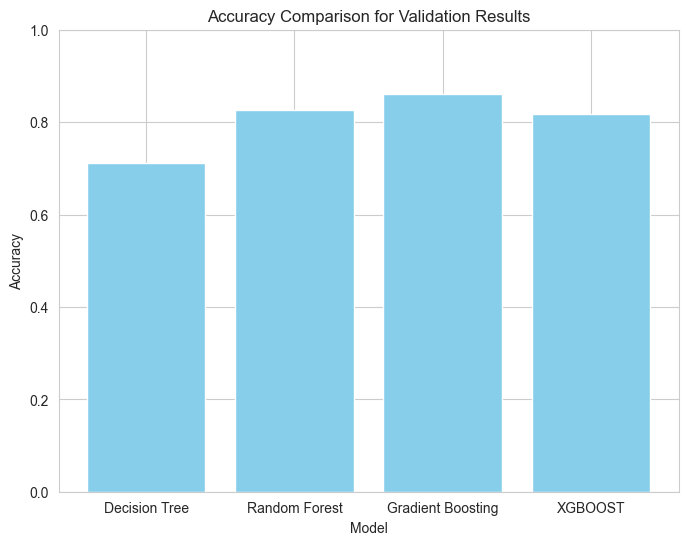

In [116]:
df_validation = pd.DataFrame(metrics_results_Tuned_par_val)

plt.figure(figsize=(8, 6))
plt.bar(df_validation['Model'], df_validation['Accuracy'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison for Validation Results')
plt.ylim(0, 1)
plt.show()

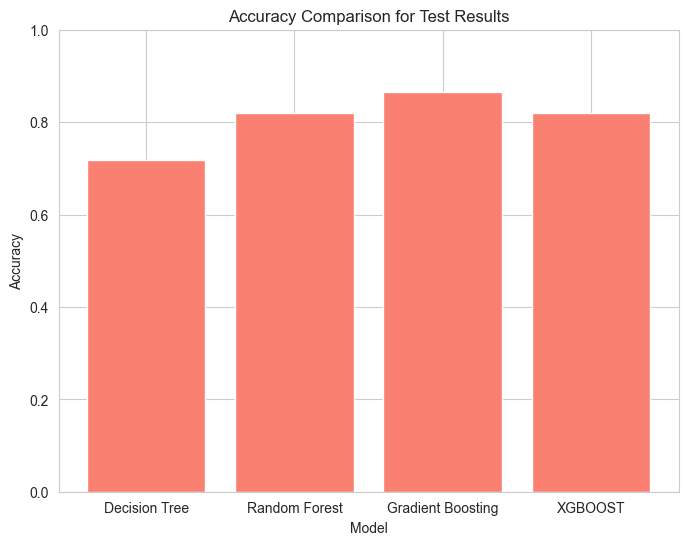

In [117]:
df_test = pd.DataFrame(metrics_results_Tuned_par_test)

plt.figure(figsize=(8, 6))
plt.bar(df_test['Model'], df_test['Accuracy'], color='salmon')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison for Test Results')
plt.ylim(0, 1)
plt.show()

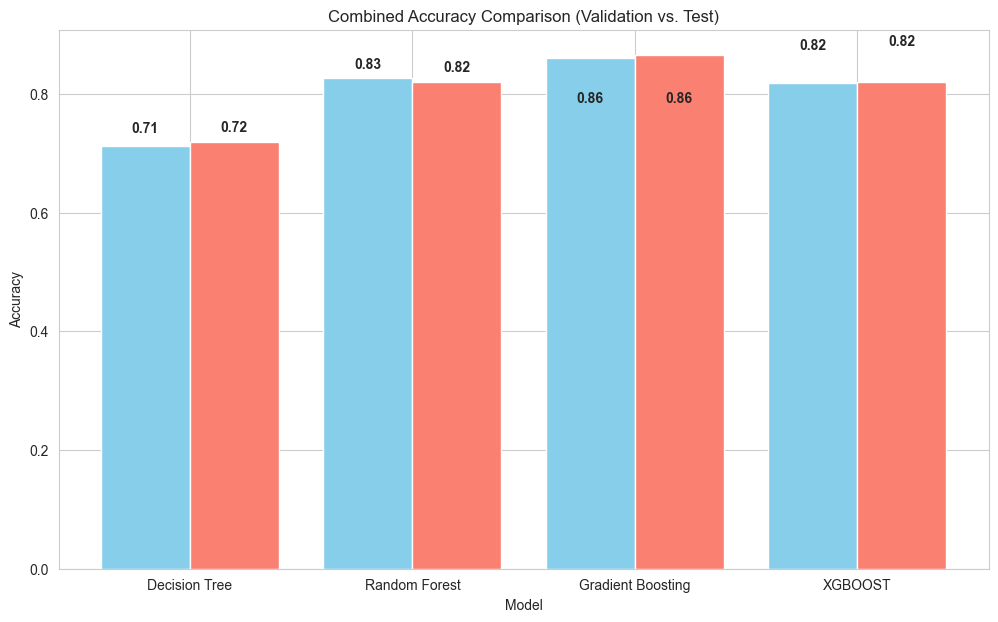

[0.7186868686868687, 0.8202020202020202, 0.8646464646464647, 0.8202020202020202]


In [118]:
# Set the figure size
plt.figure(figsize=(12, 7))
bar_width = 0.4
bar_positions_validation = list(range(len(df_validation)))
bar_positions_test = [i + bar_width for i in bar_positions_validation]

plt.bar(bar_positions_validation, df_validation['Accuracy'], color='skyblue', width=bar_width, label='Validation Accuracy')
plt.bar(bar_positions_test, df_test['Accuracy'], color='salmon', width=bar_width, label='Test Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Combined Accuracy Comparison (Validation vs. Test)')
plt.xticks([i + bar_width / 2 for i in bar_positions_validation], df_validation['Model'])

for i in bar_positions_validation:
    plt.text(i, df_validation_baseline['Accuracy'][i] + 0.01, f"{metrics_results_Tuned_par_val['Accuracy'][i]:.2f}", ha='center', fontsize=10, fontweight='bold')
    plt.text(i + bar_width, df_test_baseline['Accuracy'][i] + 0.01, f"{metrics_results_Tuned_par_test['Accuracy'][i]:.2f}", ha='center', fontsize=10, fontweight='bold')

plt.show()

print(metrics_results_Tuned_par_test['Accuracy'])

# Models with Grid Search 

In [119]:
measures_test = pd.DataFrame(index = ["accuracy_score","recall_score","precision_score","f1_score"],columns=["DT","RF","GB","XGB"])

In [120]:
measures_validate = pd.DataFrame(index = ["accuracy_score","recall_score","precision_score","f1_score"],columns=["DT","RF","GB","XGB"])


## Decision Tree

In [121]:
param_grid = {
    'max_depth': [2, 5, 7, 9, 13, 17, 20],
    'min_samples_split': [3, 4, 5, 6, 7, 9] }

In [122]:
dt_model = DecisionTreeClassifier(random_state=60)
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)
best_dt_model = grid_search.best_estimator_
best_params_dt = grid_search.best_params_
y_train_pred = best_dt_model.predict(X_train)
y_val_pred = best_dt_model.predict(X_validate)
y_test_pred = best_dt_model.predict(X_test)

In [123]:
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred, average='weighted', zero_division=1)
recall_train = recall_score(y_train, y_train_pred, average='weighted')
f1_train = f1_score(y_train, y_train_pred, average='weighted')

measures_train = pd.DataFrame(index=["accuracy_score", "recall_score", "precision_score", "f1_score"], columns=["DT"])

measures_train.at["accuracy_score", "DT"] = accuracy_train
measures_train.at["precision_score", "DT"] = precision_train
measures_train.at["recall_score", "DT"] = recall_train
measures_train.at["f1_score", "DT"] = f1_train

print("\nTraining set evaluation:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)


Training set evaluation:
Accuracy: 0.9750280583613917
Precision: 0.9756343382352628
Recall: 0.9750280583613917
F1 Score: 0.975057412750866


In [124]:
accuracy_val = accuracy_score(y_validate, y_val_pred)
precision_val = precision_score(y_validate, y_val_pred, average='weighted')
recall_val = recall_score(y_validate, y_val_pred, average='weighted')
f1_val = f1_score(y_validate, y_val_pred, average='weighted')

measures_validate.at["accuracy_score", "DT"] = accuracy_val
measures_validate.at["precision_score", "DT"] = precision_val
measures_validate.at["recall_score", "DT"] = recall_val
measures_validate.at["f1_score", "DT"] = f1_val

print("Validation set evaluation:") 
print("Accuracy:", accuracy_val) 
print("Precision:", precision_val) 
print("Recall:", recall_val) 
print("F1 Score:", f1_val)

Validation set evaluation:
Accuracy: 0.7133838383838383
Precision: 0.7153149906565521
Recall: 0.7133838383838383
F1 Score: 0.7140640015892796


In [125]:
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='weighted')
recall_test = recall_score(y_test, y_test_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')

measures_test.at["accuracy_score", "DT"] = accuracy_test
measures_test.at["precision_score", "DT"] = precision_test
measures_test.at["recall_score", "DT"] = recall_test
measures_test.at["f1_score", "DT"] = f1_test

print("\nTest set evaluation:") 
print("Accuracy:", accuracy_test) 
print("Precision:", precision_test) 
print("Recall:", recall_test) 
print("F1 Score:", f1_test)


Test set evaluation:
Accuracy: 0.7277777777777777
Precision: 0.7296267711518521
Recall: 0.7277777777777777
F1 Score: 0.7284107199180215


In [126]:
print("\nBest parameters found:", best_params_dt)


Best parameters found: {'max_depth': 20, 'min_samples_split': 3}


In [127]:
print("\nMeasures Results (Validation):\n", measures_validate) 
print("\nMeasures Results (Test):\n", measures_test)


Measures Results (Validation):
                        DT   RF   GB  XGB
accuracy_score   0.713384  NaN  NaN  NaN
recall_score     0.713384  NaN  NaN  NaN
precision_score  0.715315  NaN  NaN  NaN
f1_score         0.714064  NaN  NaN  NaN

Measures Results (Test):
                        DT   RF   GB  XGB
accuracy_score   0.727778  NaN  NaN  NaN
recall_score     0.727778  NaN  NaN  NaN
precision_score  0.729627  NaN  NaN  NaN
f1_score         0.728411  NaN  NaN  NaN


## Random Forest

In [128]:
param_grid = {
    'n_estimators': [3,6,7,9,13,16,17,21,26],
    'max_depth': [2,3,4,6,7,8,9,10],
    'min_samples_split': [3,6,8,13,16,18] }

In [129]:
rf_model = RandomForestClassifier(random_state=60)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_
best_params_rf = grid_search.best_params_
y_train_pred = best_rf_model.predict(X_train)
y_val_pred = best_rf_model.predict(X_validate)
y_test_pred = best_rf_model.predict(X_test)

In [130]:
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred, average='weighted', zero_division=1)
recall_train = recall_score(y_train, y_train_pred, average='weighted')
f1_train = f1_score(y_train, y_train_pred, average='weighted')

measures_train = pd.DataFrame(index=["accuracy_score", "recall_score", "precision_score", "f1_score"], columns=["RF"])

measures_train.at["accuracy_score", "RF"] = accuracy_train
measures_train.at["precision_score", "RF"] = precision_train
measures_train.at["recall_score", "RF"] = recall_train
measures_train.at["f1_score", "RF"] = f1_train

print("\nTraining set evaluation:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)


Training set evaluation:
Accuracy: 0.9245230078563412
Precision: 0.9258804438492274
Recall: 0.9245230078563412
F1 Score: 0.9248079825164849


In [131]:
accuracy_val = accuracy_score(y_validate, y_val_pred)
precision_val = precision_score(y_validate, y_val_pred, average='weighted')
recall_val = recall_score(y_validate, y_val_pred, average='weighted')
f1_val = f1_score(y_validate, y_val_pred, average='weighted')

measures_validate.at["accuracy_score", "RF"] = accuracy_val
measures_validate.at["precision_score", "RF"] = precision_val
measures_validate.at["recall_score", "RF"] = recall_val
measures_validate.at["f1_score", "RF"] = f1_val

print("Validation set evaluation:") 
print("Accuracy:", accuracy_val) 
print("Precision:", precision_val) 
print("Recall:", recall_val) 
print("F1 Score:", f1_val)

Validation set evaluation:
Accuracy: 0.7996632996632996
Precision: 0.8008417493744872
Recall: 0.7996632996632996
F1 Score: 0.8000762410281349


In [132]:
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='weighted')
recall_test = recall_score(y_test, y_test_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')

measures_test.at["accuracy_score", "RF"] = accuracy_test
measures_test.at["precision_score", "RF"] = precision_test
measures_test.at["recall_score", "RF"] = recall_test
measures_test.at["f1_score", "RF"] = f1_test

print("\nTest set evaluation:") 
print("Accuracy:", accuracy_test) 
print("Precision:", precision_test) 
print("Recall:", recall_test) 
print("F1 Score:", f1_test)


Test set evaluation:
Accuracy: 0.7893939393939394
Precision: 0.7902363106471753
Recall: 0.7893939393939394
F1 Score: 0.7897285524778379


In [133]:
print("\nBest parameters found:", best_params_rf)


Best parameters found: {'max_depth': 10, 'min_samples_split': 3, 'n_estimators': 26}


In [134]:
print("\nMeasures Results (Validation):\n", measures_validate) 
print("\nMeasures Results (Test):\n", measures_test)


Measures Results (Validation):
                        DT        RF   GB  XGB
accuracy_score   0.713384  0.799663  NaN  NaN
recall_score     0.713384  0.799663  NaN  NaN
precision_score  0.715315  0.800842  NaN  NaN
f1_score         0.714064  0.800076  NaN  NaN

Measures Results (Test):
                        DT        RF   GB  XGB
accuracy_score   0.727778  0.789394  NaN  NaN
recall_score     0.727778  0.789394  NaN  NaN
precision_score  0.729627  0.790236  NaN  NaN
f1_score         0.728411  0.789729  NaN  NaN


## Gradient Boosting

In [149]:
param_grid = {
    'n_estimators': [3,6,7,9,13,24,18,27,39],
    'learning_rate': [0.2],
    'max_depth': [2,3,4,6,30,19,21,15],
    'min_samples_split': [3,6,8,13,16,18] }

In [ ]:
gb_model = GradientBoostingClassifier(random_state=60)
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)
best_gb_model = grid_search.best_estimator_
best_params_gb = grid_search.best_params_
y_train_pred = best_gb_model.predict(X_train)
y_val_pred = best_gb_model.predict(X_validate)
y_test_pred = best_gb_model.predict(X_test)

In [ ]:
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred, average='weighted', zero_division=1)
recall_train = recall_score(y_train, y_train_pred, average='weighted')
f1_train = f1_score(y_train, y_train_pred, average='weighted')

measures_train = pd.DataFrame(index=["accuracy_score", "recall_score", "precision_score", "f1_score"], columns=["GD"])

measures_train.at["accuracy_score", "GD"] = accuracy_train
measures_train.at["precision_score", "GD"] = precision_train
measures_train.at["recall_score", "GD"] = recall_train
measures_train.at["f1_score", "GD"] = f1_train

print("\nTraining set evaluation:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)

In [ ]:
accuracy_val = accuracy_score(y_validate, y_val_pred)
precision_val = precision_score(y_validate, y_val_pred, average='weighted')
recall_val = recall_score(y_validate, y_val_pred, average='weighted')
f1_val = f1_score(y_validate, y_val_pred, average='weighted')

measures_validate.at["accuracy_score", "GB"] = accuracy_val
measures_validate.at["precision_score", "GB"] = precision_val
measures_validate.at["recall_score", "GB"] = recall_val
measures_validate.at["f1_score", "GB"] = f1_val

print("Validation set evaluation:") 
print("Accuracy:", accuracy_val) 
print("Precision:", precision_val) 
print("Recall:", recall_val) 
print("F1 Score:", f1_val)

In [ ]:
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='weighted')
recall_test = recall_score(y_test, y_test_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')

measures_test.at["accuracy_score", "GB"] = accuracy_test
measures_test.at["precision_score", "GB"] = precision_test
measures_test.at["recall_score", "GB"] = recall_test
measures_test.at["f1_score", "GB"] = f1_test

print("\nTest set evaluation:") 
print("Accuracy:", accuracy_test) 
print("Precision:", precision_test) 
print("Recall:", recall_test) 
print("F1 Score:", f1_test)

In [ ]:
print("\nBest parameters found:", best_params_gb)

In [ ]:
print("\nMeasures Results (Validation):\n", measures_validate) 
print("\nMeasures Results (Test):\n", measures_test)

## XGBOOST 

In [139]:
param_grid = {
    'n_estimators': [3,6,7,9,17,23,29,31,46],
    'learning_rate': [0.01],
    'max_depth': [2,3,4,6,7,8,9,10],}

In [140]:
xgb_model = xgb.XGBClassifier(random_state=60)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)
best_xgb_model = grid_search.best_estimator_
best_params_xg = grid_search.best_params_
y_train_pred = best_xgb_model.predict(X_train)
y_val_pred = best_xgb_model.predict(X_validate)
y_test_pred = best_xgb_model.predict(X_test)

In [141]:
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred, average='weighted', zero_division=1)
recall_train = recall_score(y_train, y_train_pred, average='weighted')
f1_train = f1_score(y_train, y_train_pred, average='weighted')

measures_train = pd.DataFrame(index=["accuracy_score", "recall_score", "precision_score", "f1_score"], columns=["XGB"])

measures_train.at["accuracy_score", "XGB"] = accuracy_train
measures_train.at["precision_score", "XGB"] = precision_train
measures_train.at["recall_score", "XGB"] = recall_train
measures_train.at["f1_score", "XGB"] = f1_train

print("\nTraining set evaluation:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)


Training set evaluation:
Accuracy: 0.9172278338945006
Precision: 0.9191422892852208
Recall: 0.9172278338945006
F1 Score: 0.9175969223186119


In [142]:
accuracy_val = accuracy_score(y_validate, y_val_pred)
precision_val = precision_score(y_validate, y_val_pred, average='weighted')
recall_val = recall_score(y_validate, y_val_pred, average='weighted')
f1_val = f1_score(y_validate, y_val_pred, average='weighted')

measures_validate.at["accuracy_score", "XGB"] = accuracy_val
measures_validate.at["precision_score", "XGB"] = precision_val
measures_validate.at["recall_score", "XGB"] = recall_val
measures_validate.at["f1_score", "XGB"] = f1_val

print("Validation set evaluation:") 
print("Accuracy:", accuracy_val) 
print("Precision:", precision_val) 
print("Recall:", recall_val) 
print("F1 Score:", f1_val)

Validation set evaluation:
Accuracy: 0.7672558922558923
Precision: 0.7687300206599511
Recall: 0.7672558922558923
F1 Score: 0.7676315618559334


In [143]:
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='weighted')
recall_test = recall_score(y_test, y_test_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')

measures_test.at["accuracy_score", "XGB"] = accuracy_test
measures_test.at["precision_score", "XGB"] = precision_test
measures_test.at["recall_score", "XGB"] = recall_test
measures_test.at["f1_score", "XGB"] = f1_test

print("\nTest set evaluation:") 
print("Accuracy:", accuracy_test) 
print("Precision:", precision_test) 
print("Recall:", recall_test) 
print("F1 Score:", f1_test)



Test set evaluation:
Accuracy: 0.7712121212121212
Precision: 0.7728469133002767
Recall: 0.7712121212121212
F1 Score: 0.7717202884024287


In [144]:
print("\nBest parameters found:", best_params_xg)


Best parameters found: {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 46}


In [145]:
print("\nMeasures Results (Validation):\n", measures_validate) 
print("\nMeasures Results (Test):\n", measures_test)


Measures Results (Validation):
                        DT        RF   GB       XGB
accuracy_score   0.713384  0.799663  NaN  0.767256
recall_score     0.713384  0.799663  NaN  0.767256
precision_score  0.715315  0.800842  NaN   0.76873
f1_score         0.714064  0.800076  NaN  0.767632

Measures Results (Test):
                        DT        RF   GB       XGB
accuracy_score   0.727778  0.789394  NaN  0.771212
recall_score     0.727778  0.789394  NaN  0.771212
precision_score  0.729627  0.790236  NaN  0.772847
f1_score         0.728411  0.789729  NaN   0.77172


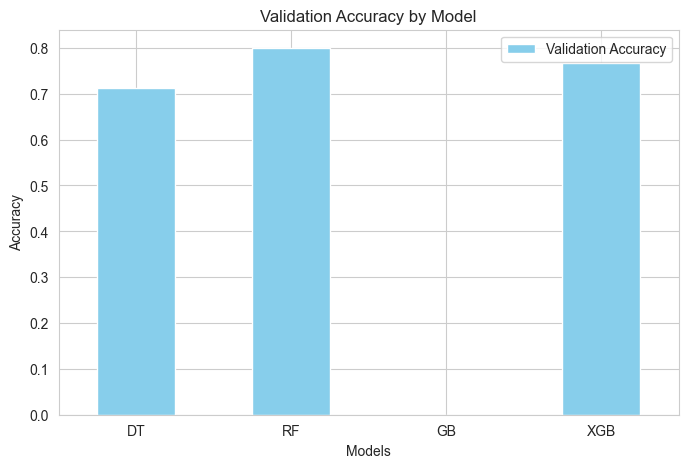

In [146]:
plt.figure(figsize=(8, 5))
validation_accuracy = measures_validate.loc["accuracy_score"]
validation_accuracy.plot(kind="bar", color="skyblue", label="Validation Accuracy", rot=0)
plt.title("Validation Accuracy by Model")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

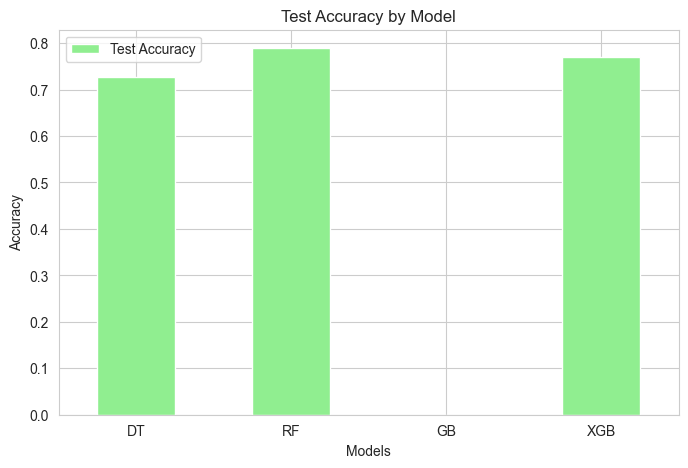

In [147]:
plt.figure(figsize=(8, 5))
test_accuracy = measures_test.loc["accuracy_score"]
test_accuracy.plot(kind="bar", color="lightgreen", label="Test Accuracy", rot=0)
plt.title("Test Accuracy by Model")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

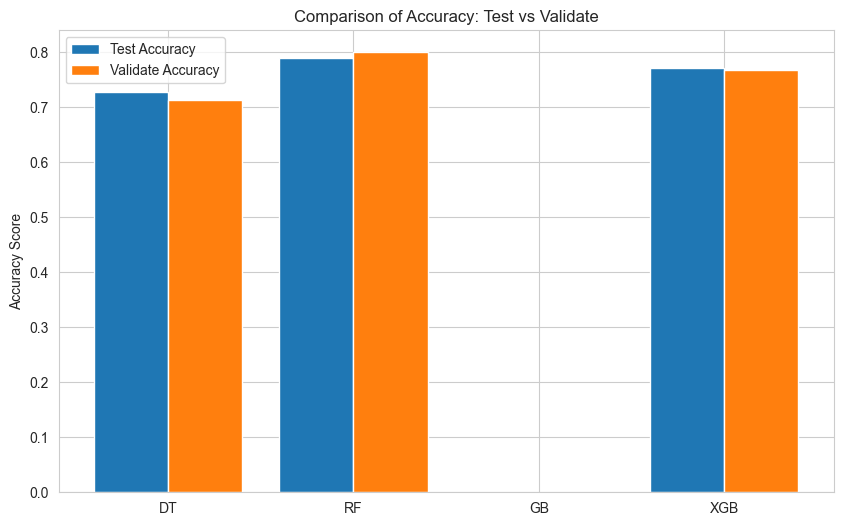

DT     0.727778
RF     0.789394
GB          NaN
XGB    0.771212
Name: accuracy_score, dtype: object


In [148]:
# Extracting accuracy scores
test_accuracy = measures_test.loc["accuracy_score"]
validate_accuracy = measures_validate.loc["accuracy_score"]

# Plotting
labels = test_accuracy.index
x = range(len(labels))

plt.figure(figsize=(10, 6))
plt.bar(x, test_accuracy, width=0.4, label="Test Accuracy", align="center")
plt.bar([i + 0.4 for i in x], validate_accuracy, width=0.4, label="Validate Accuracy", align="center")

# Formatting
plt.xticks([i + 0.2 for i in x], labels)
plt.ylabel("Accuracy Score")
plt.title("Comparison of Accuracy: Test vs Validate")
plt.legend()
plt.show()

print(test_accuracy)